In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,make_scorer
from sklearn.model_selection import GridSearchCV
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

## Import Data Set

In [2]:
#import data set
df = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Overview of DataSet

In [3]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
#null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Observations:
     we can observe that 2 column "credit_limit" has 1 null value and "minimum_payment" has 313 null values.We can remove         null value from "credit_limit" column as it has 1 null value and for "minimum_payment" we can impute necessary values .

In [5]:
#duplicate values
df.duplicated().sum()

0

## Observations:
      we can observe that there was no duplicate values.

In [6]:
#5 point summary
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Observations:
   **Balance:** mean is 1564 and median is 873. it has minimum value as 0 and 1st quartile is 128 so there are outliers present  in this column.
   
   **Balance_Frequency:** mean is 0.8 and median is 1.It has minimum values as 0 and 1st quartile as 0.8 there are outliers present in this column.
   
   **Purchases:** mean is 1003 and median is 316.it has maximum as 49039 and 3rd quartile as 1110 there are outliers present in this column.
   
   **Oneoff_purchases:** mean is 592 and median is 38.it has maximum value as 40761 and 3rd quartile as 577 there are outliers in this column.
   
   **Installments_purchases:** mean is 41 and median is 89.it has maximum value as 22500 and 3rd quartile as 468 there are outliers present in this column.
   
   **cash_advance:** mean is 978 and median is 0.it has maximum value as 47137 and 3rd quartile as 1113 there are outliers present in this column.
   
   **Purchases_frequency:** mean is 0.49 and median is 0.5.it has maximum value as 1 and 3rd quartile as 0.9.it has minimum value as 0.0 and 1st quartile as 0.08 there are no outliers present in this column.
   
   **Oneoffpurchases_frequency:** mean is 0.2 and median is 0.08.it has maximum value as 1 and 3rd quartile as 0.3 there are some outliers.
   
   **purchases_installments_frequency:** mean is 0.36 and median is 0.16.it has maximum value as 1 and 3rd quartile as 0.75 there are no outliers present in this column.
   
   **cash_advance_frequency:** mean is 0.2 and median is 0.it has maximum value as 1.5 and 3rd quartile as 0.2 there are outliers present in this column.
   
   **cash_advance_trx:** mean is 3.2 and median is 0.it has maximum value 123 and 3rd quartile as 4 there are outliers present in this column.
   
   **purchases_trx:** mean is14.7 and median is 7. it has maximum value as 358 and 3rd quartile as 17.it has minimum value as 0 and 1st quartile as 1 there are outliers present in this column.
   
   **credit_limit:** mean is 4494 and median is 3000.it has maximum value as 30000 and 3rd quartile as 6500 there are outliers present in this column.
   
   **payments:** mean 1733 and median 856.it has maximum value as 50721 and 3rd quartile as  1901 there are outliers present in this column. 
   
   **minimum_payments:** mean 864 and median 312. it has maximum value as 76406 and 3rd quartile as 8250.it has minimum value as 0 and 1st quartile as 169 there are outliers present in this column.
   
   **prc_full_payment:** maximum value as 1 and 3rd quartile as 0.1 there are outliers present in this column.
  

## Outliers detection

In [7]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

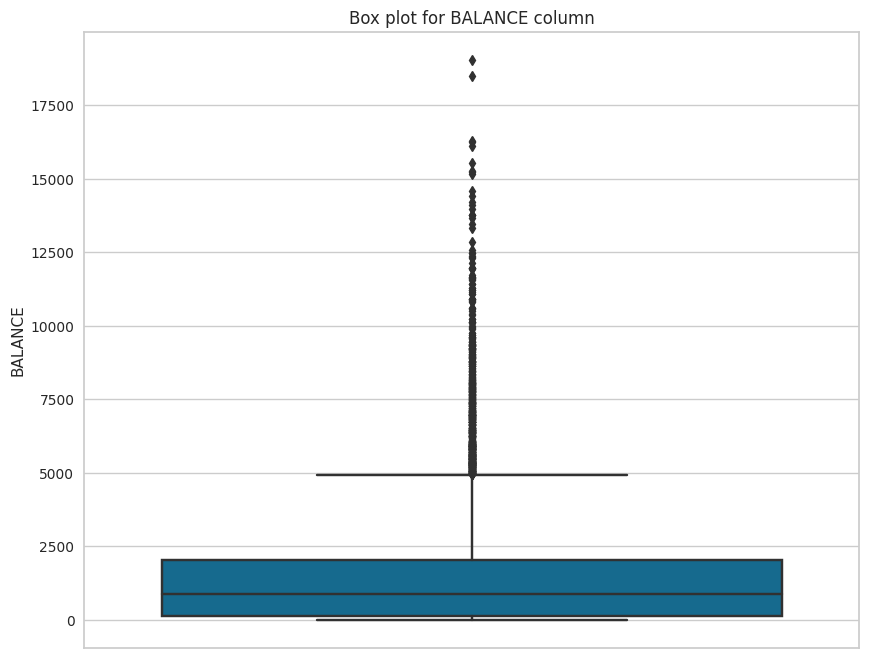

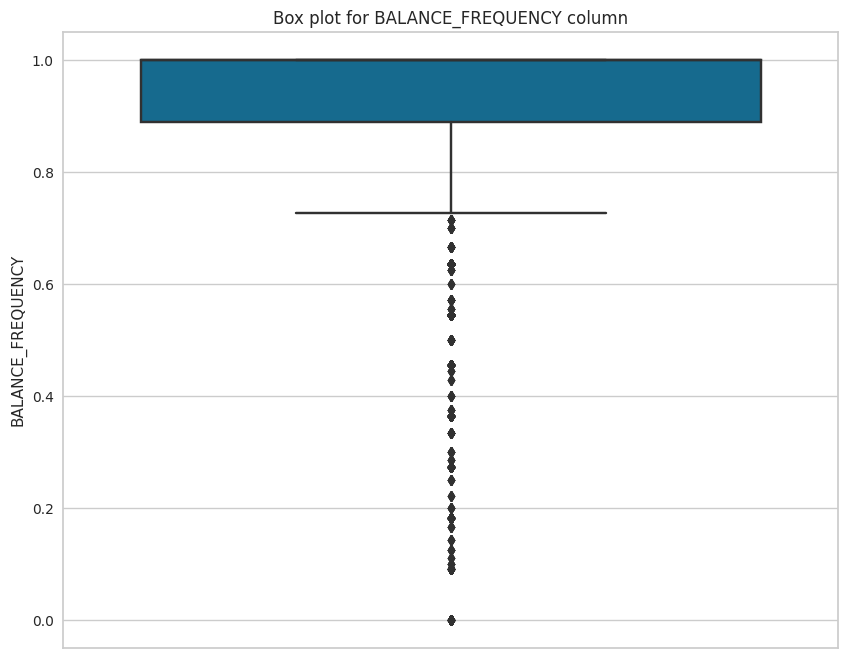

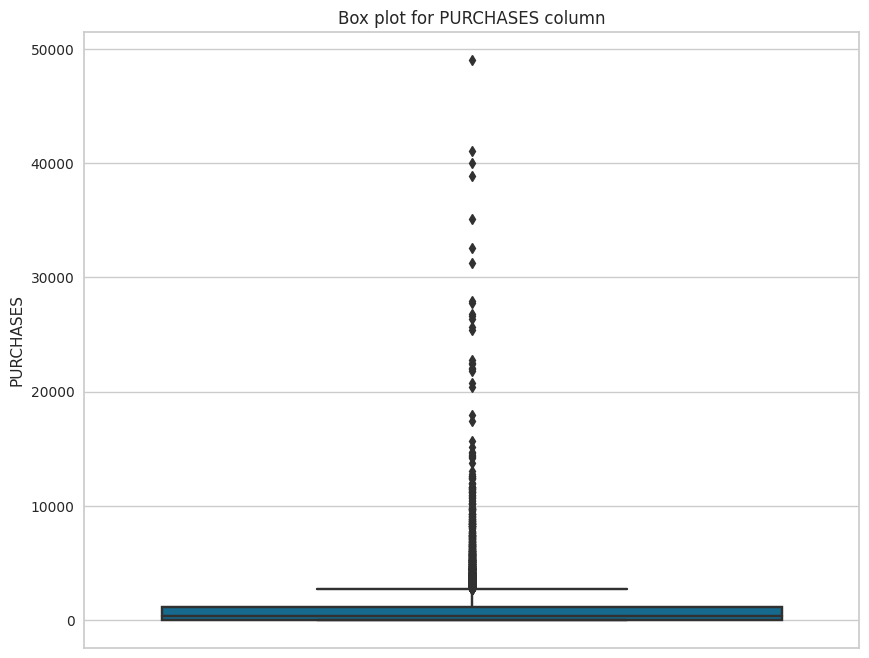

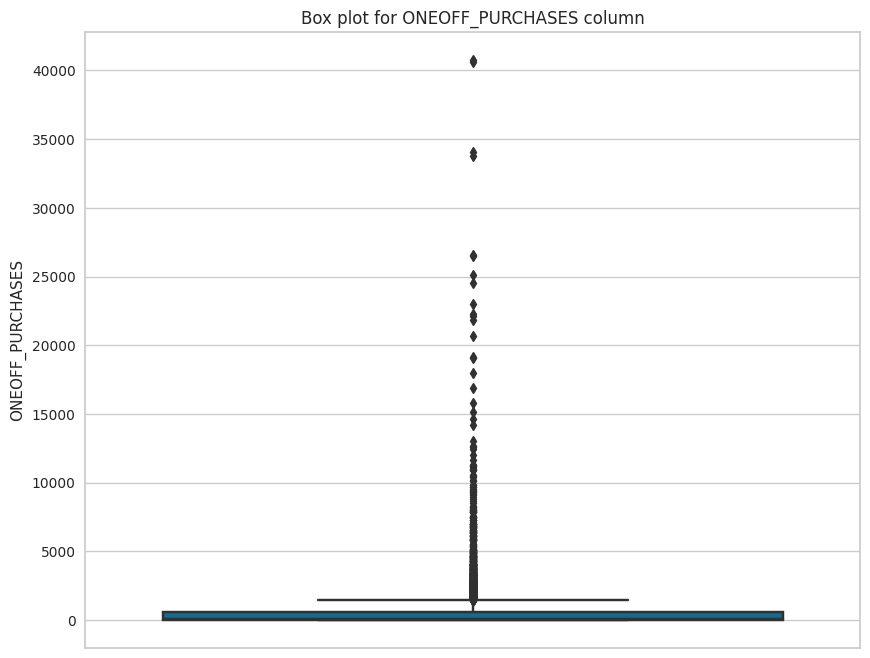

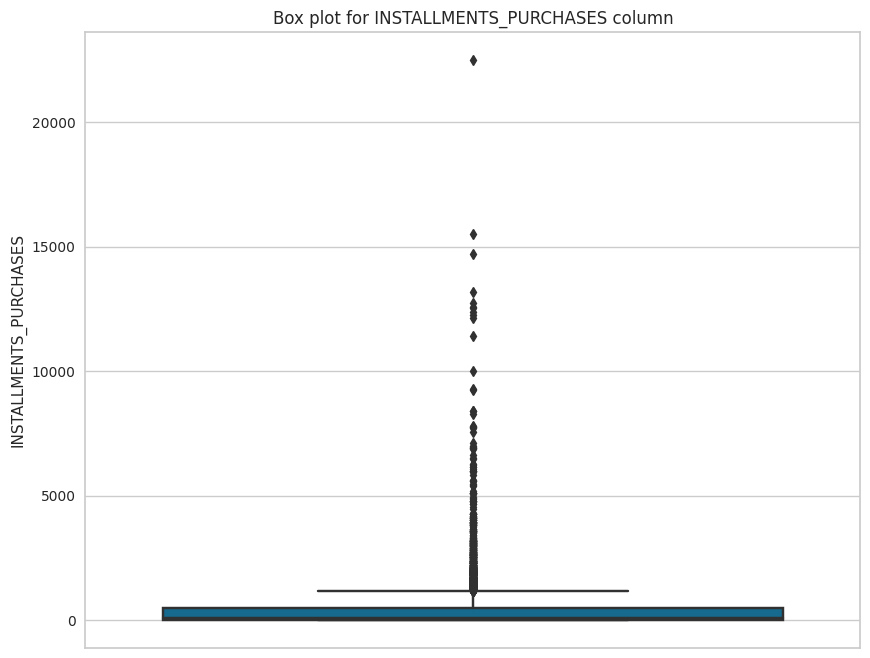

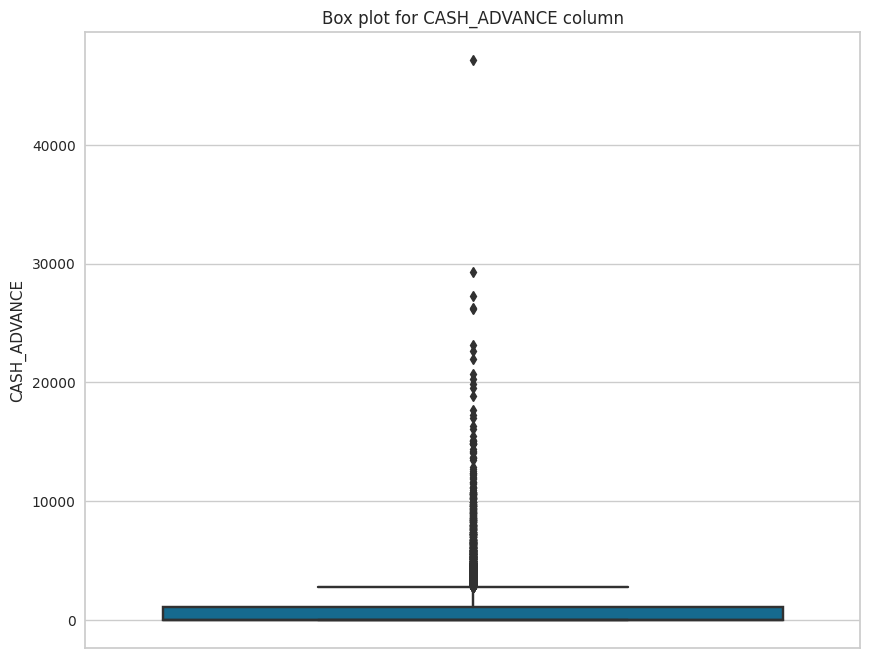

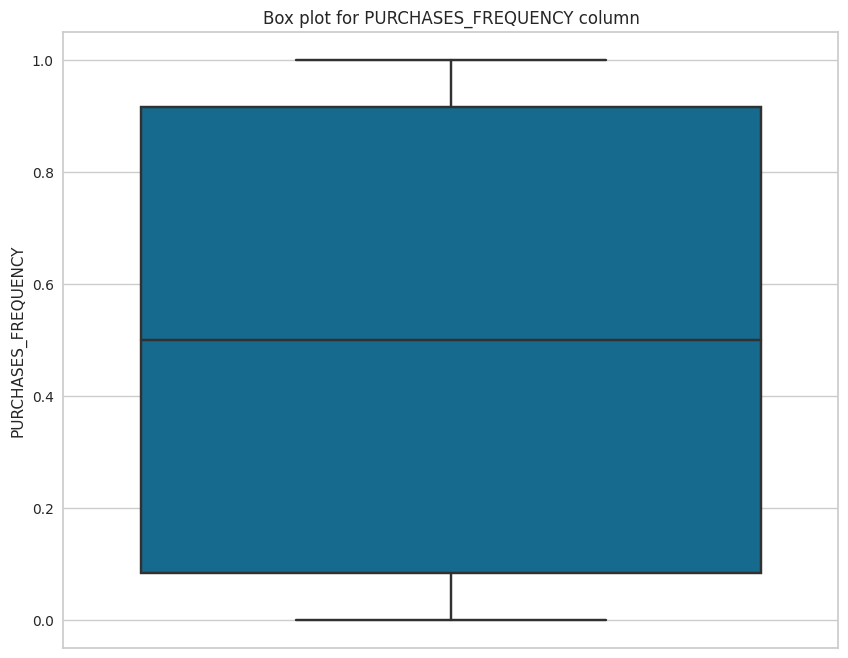

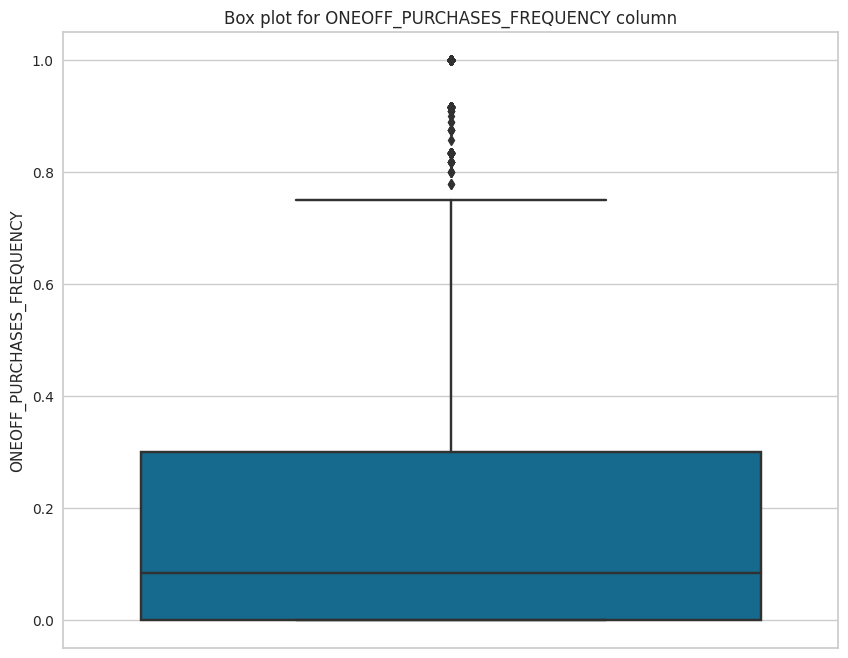

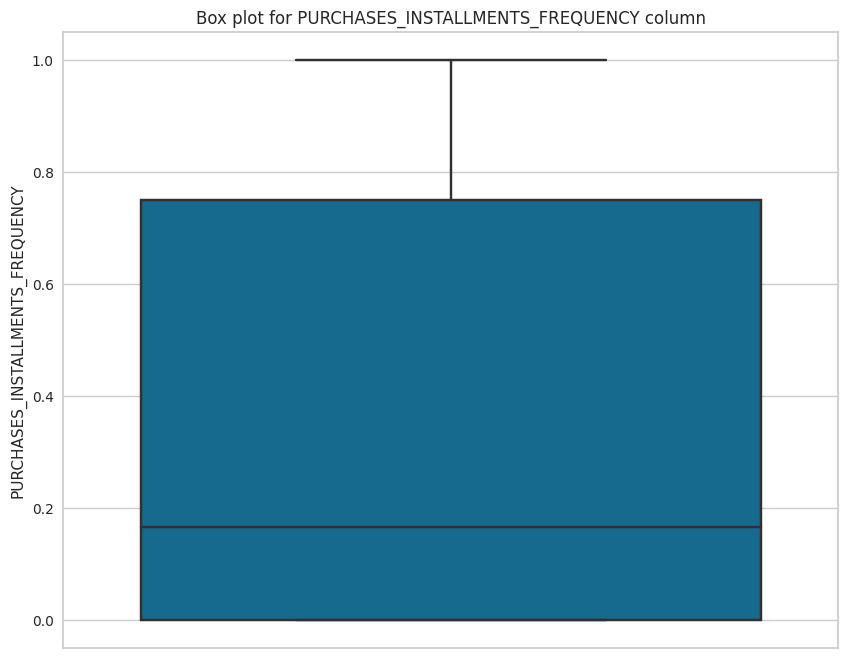

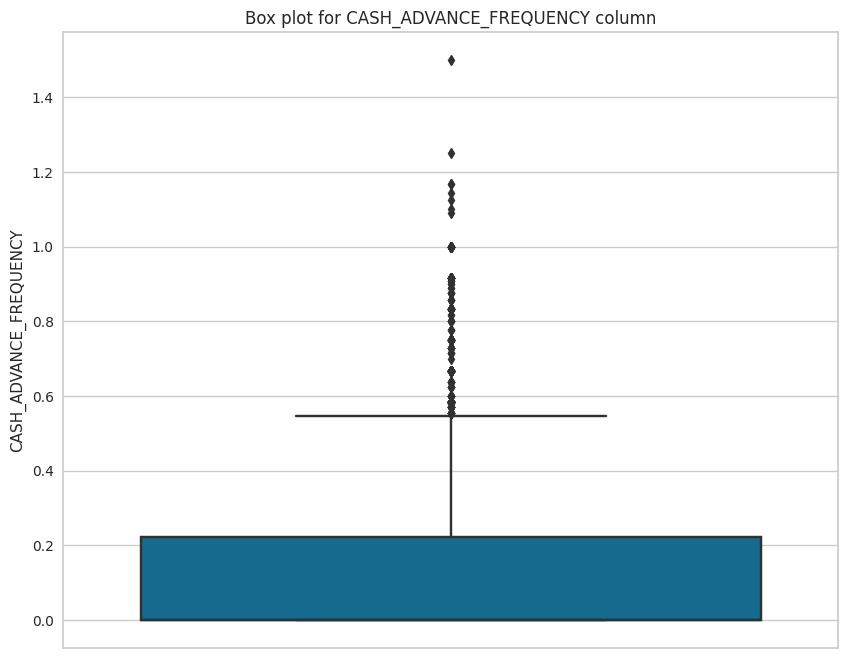

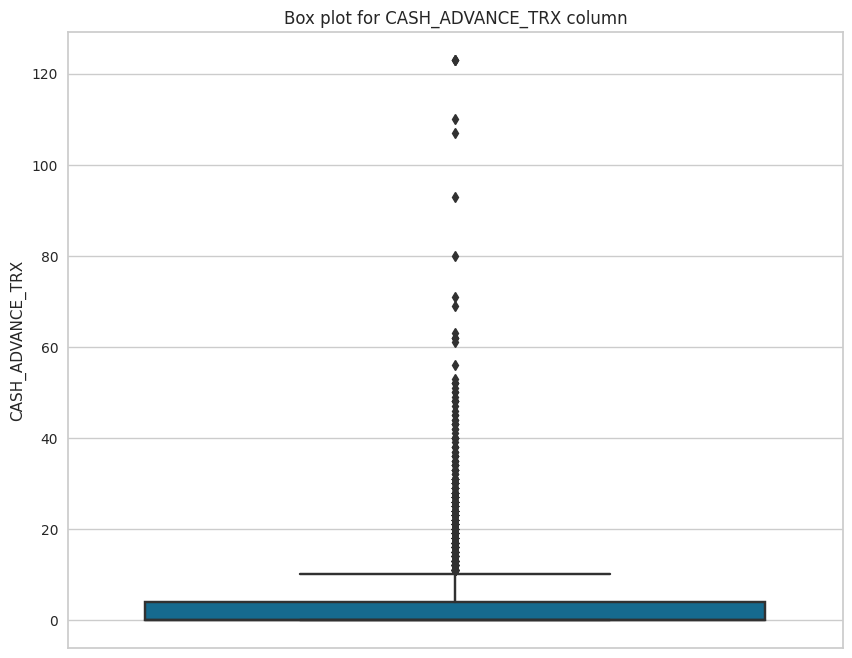

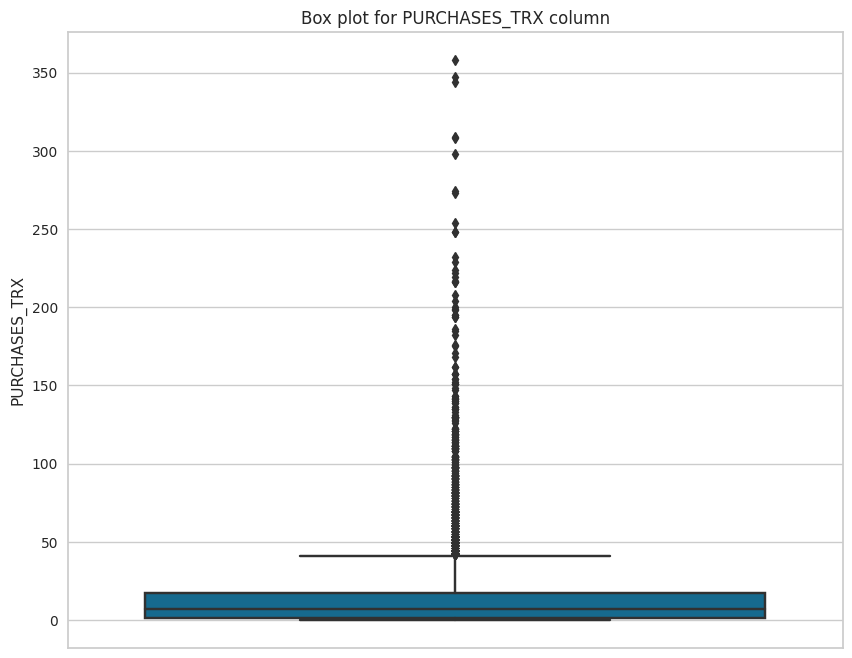

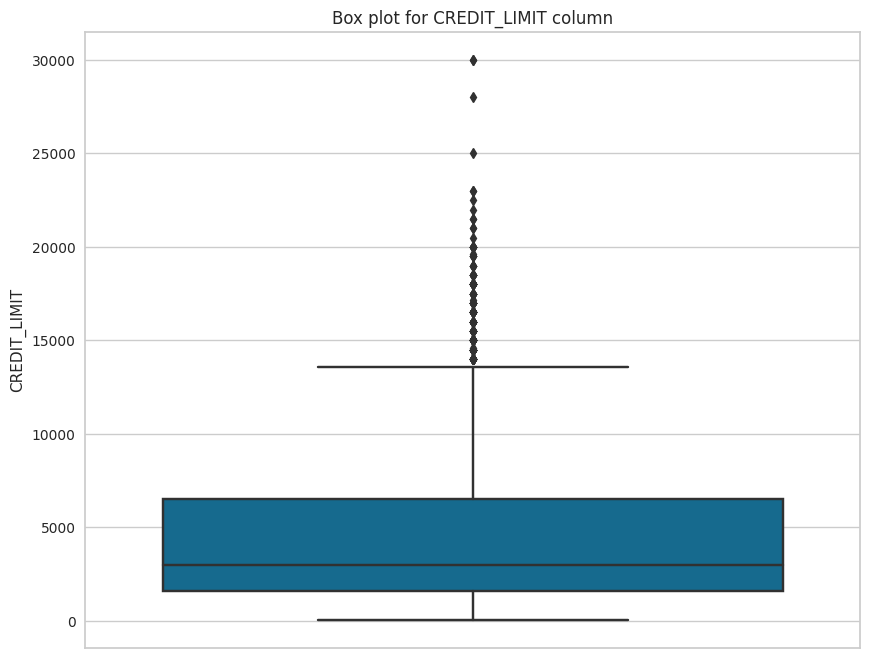

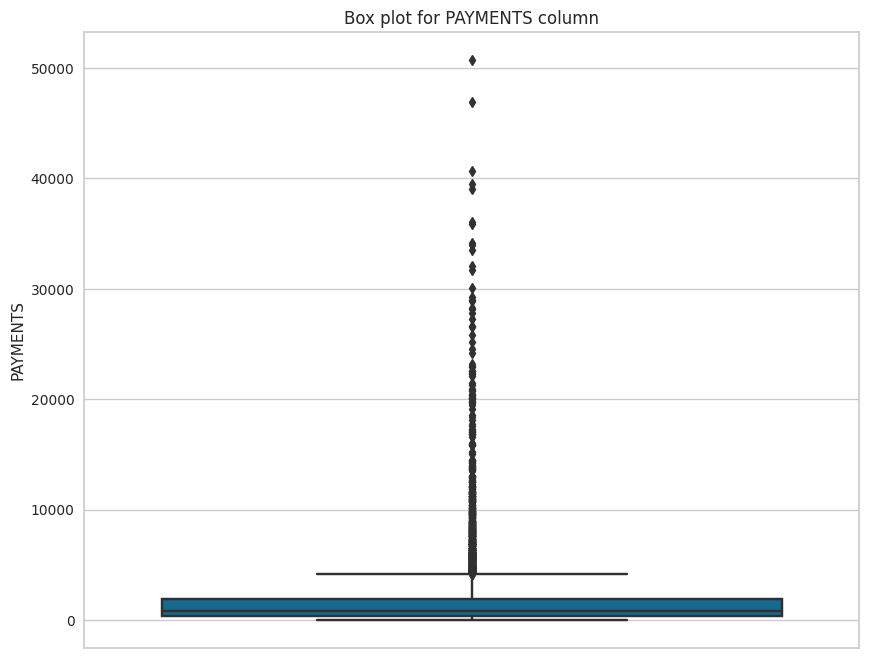

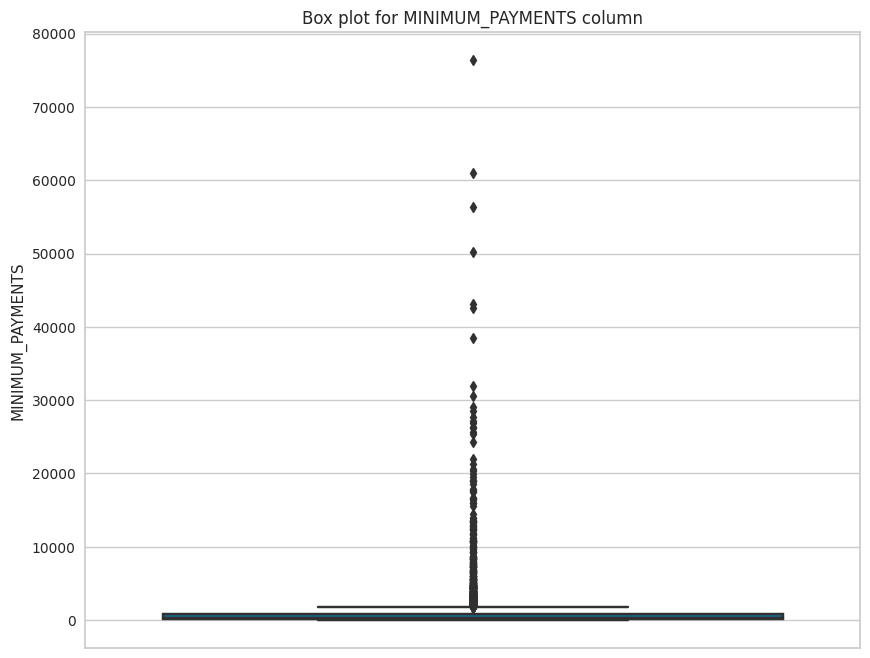

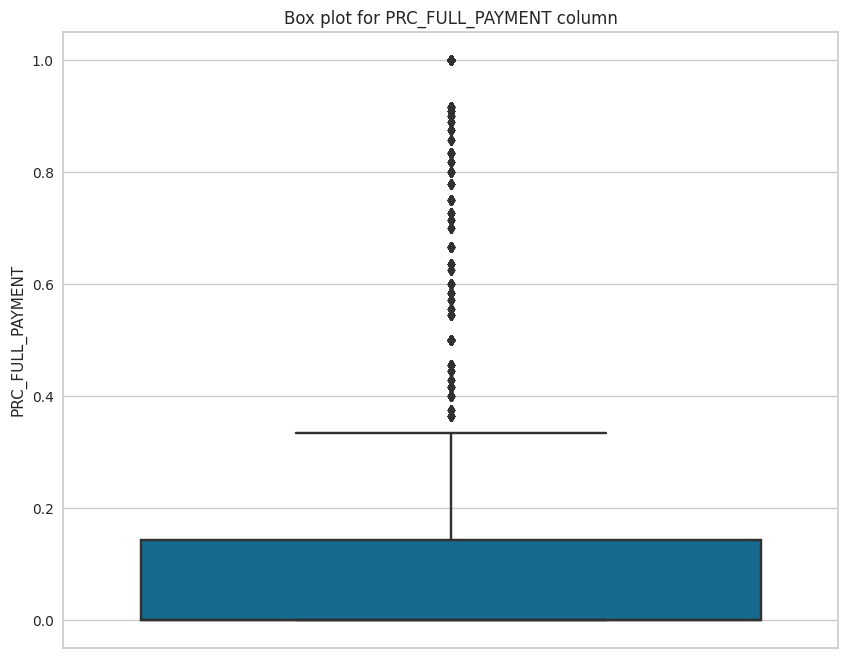

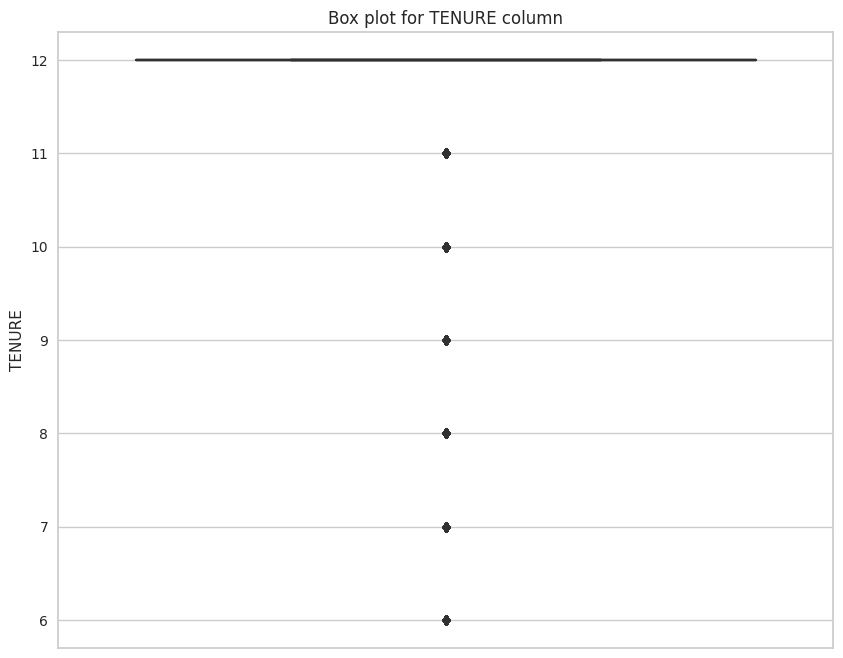

In [8]:
#box plot for outlier detection
for i in numeric_cols:
    plt.figure(figsize = (10,8))
    sns.boxplot(y=df[i])
    plt.title(f"Box plot for {i} column")
    plt.show()

## Univariate Analysis

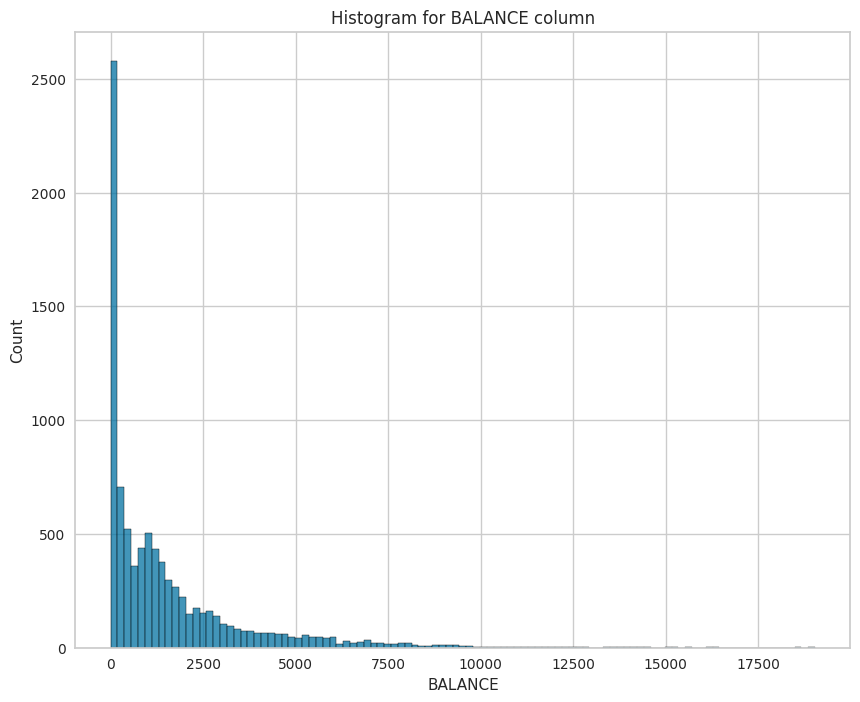

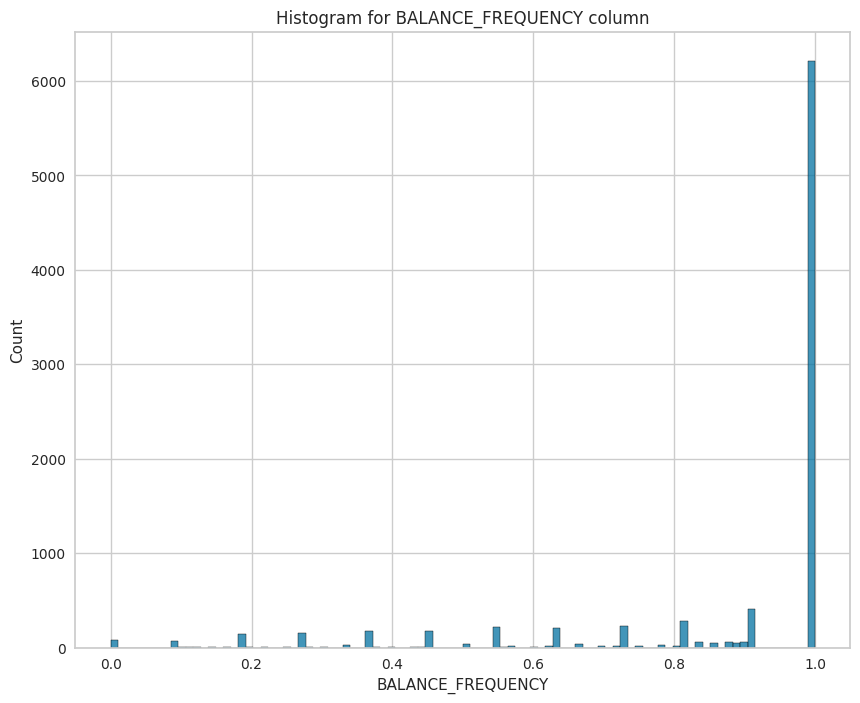

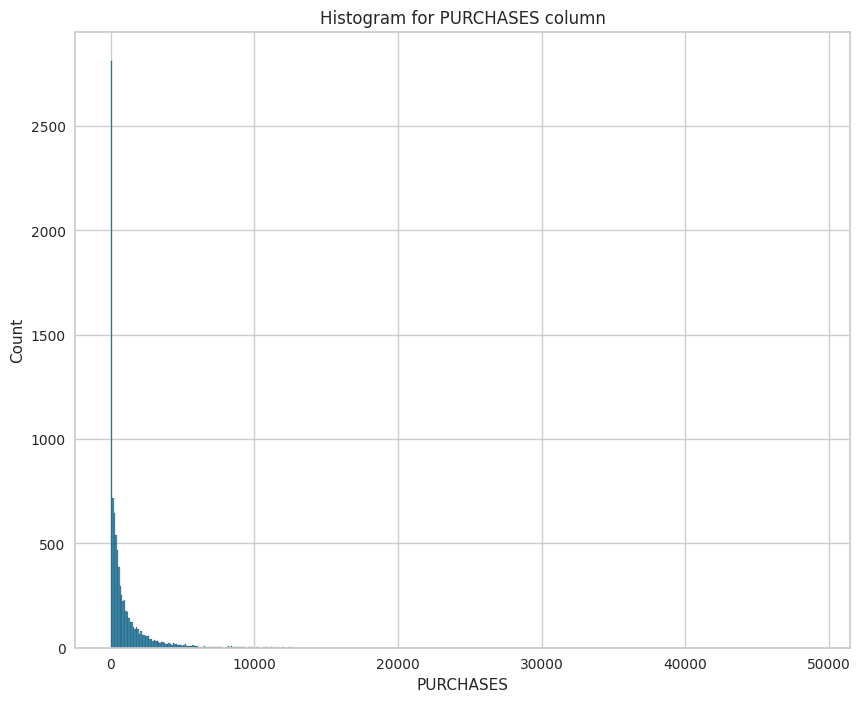

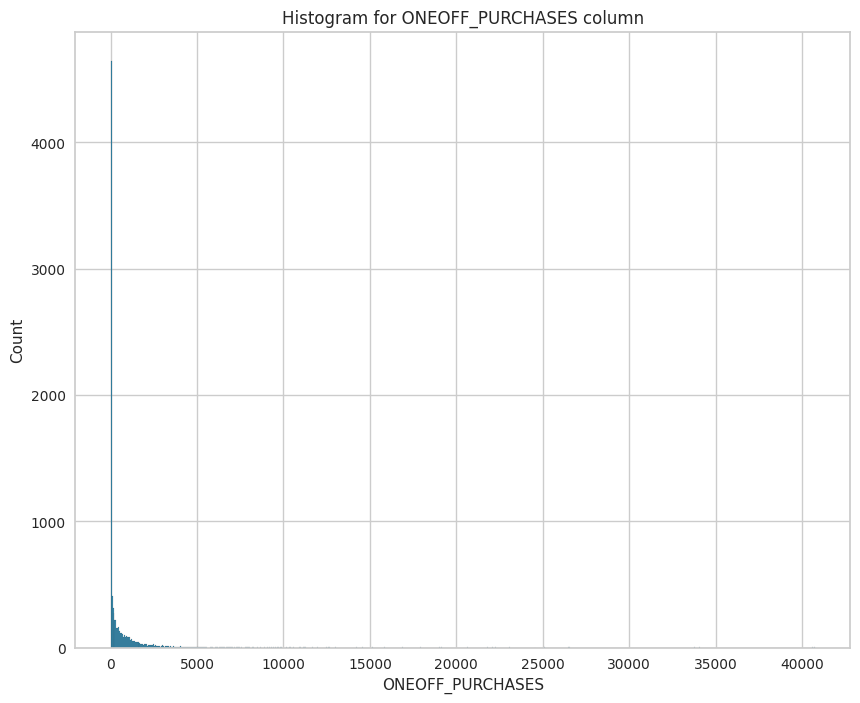

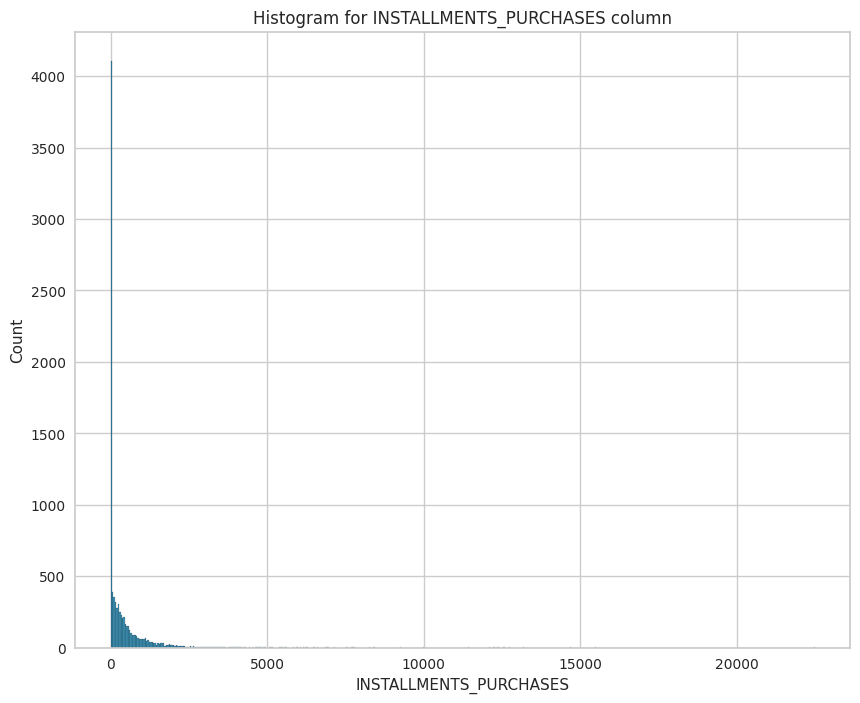

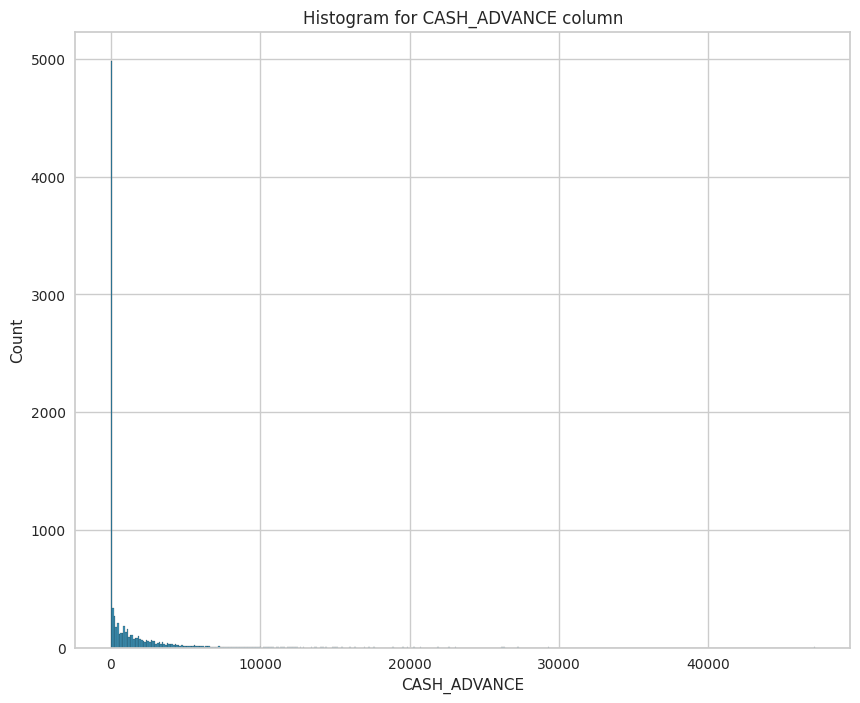

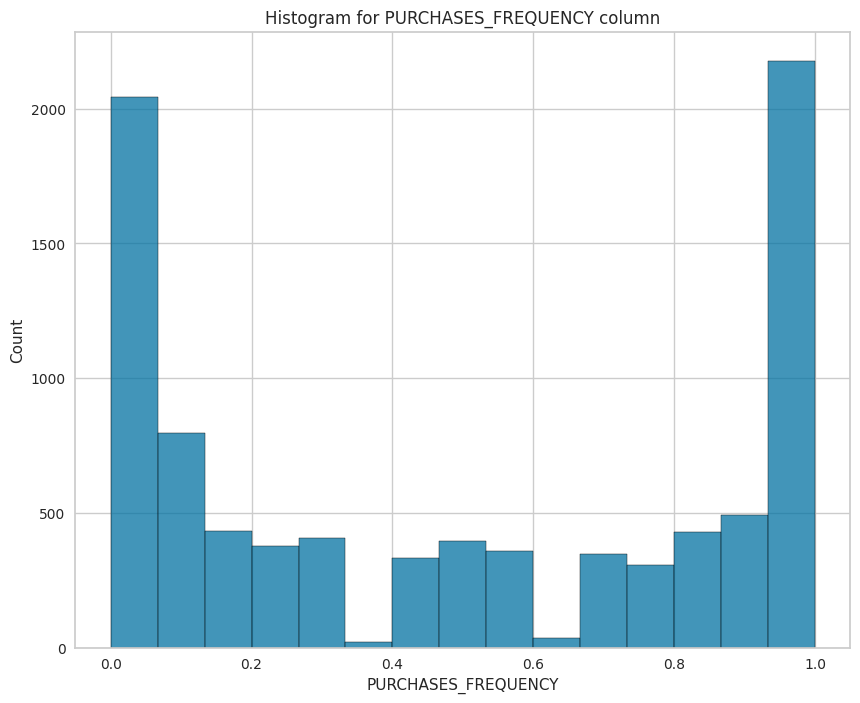

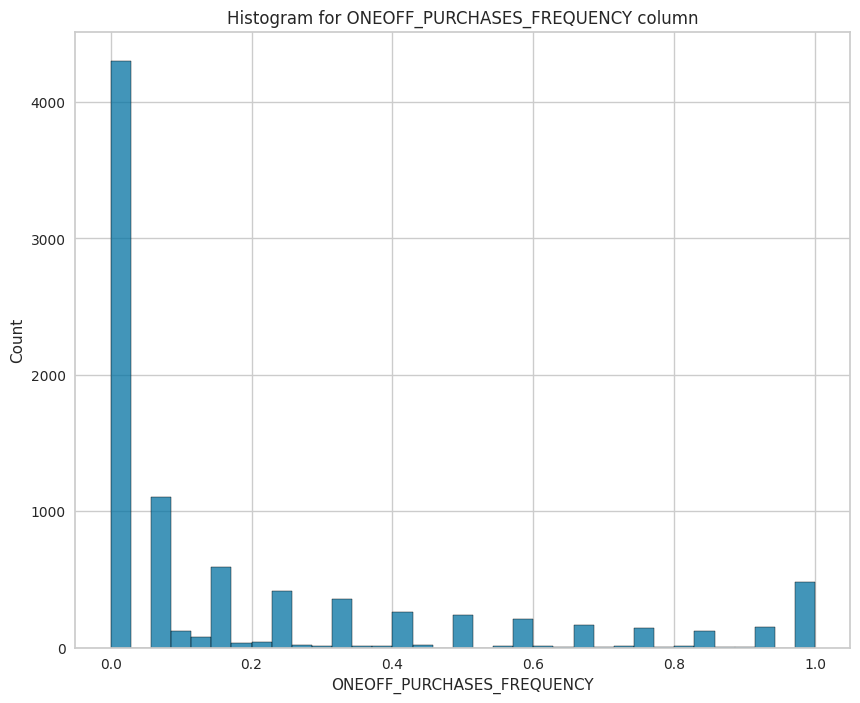

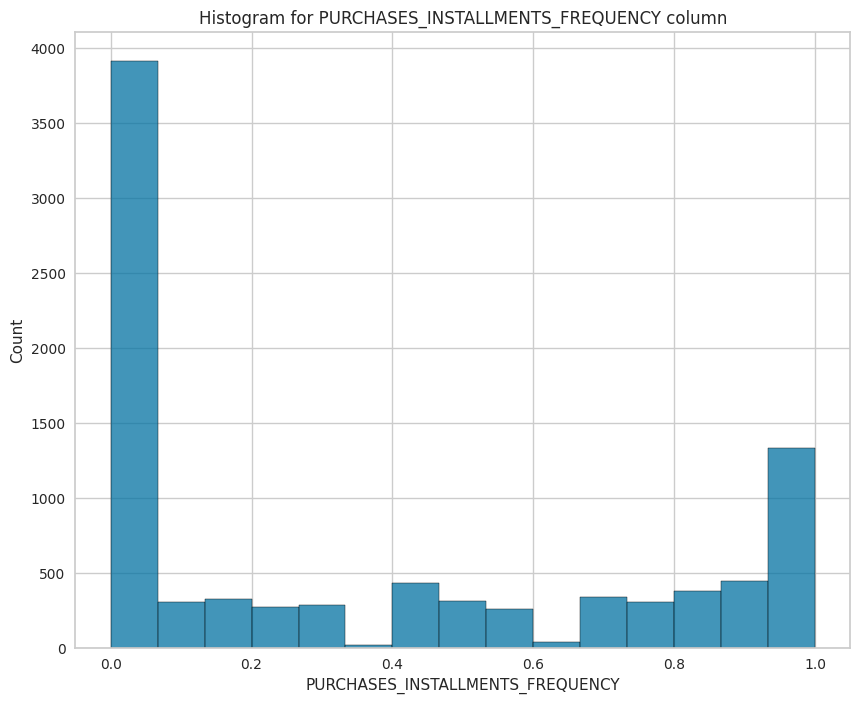

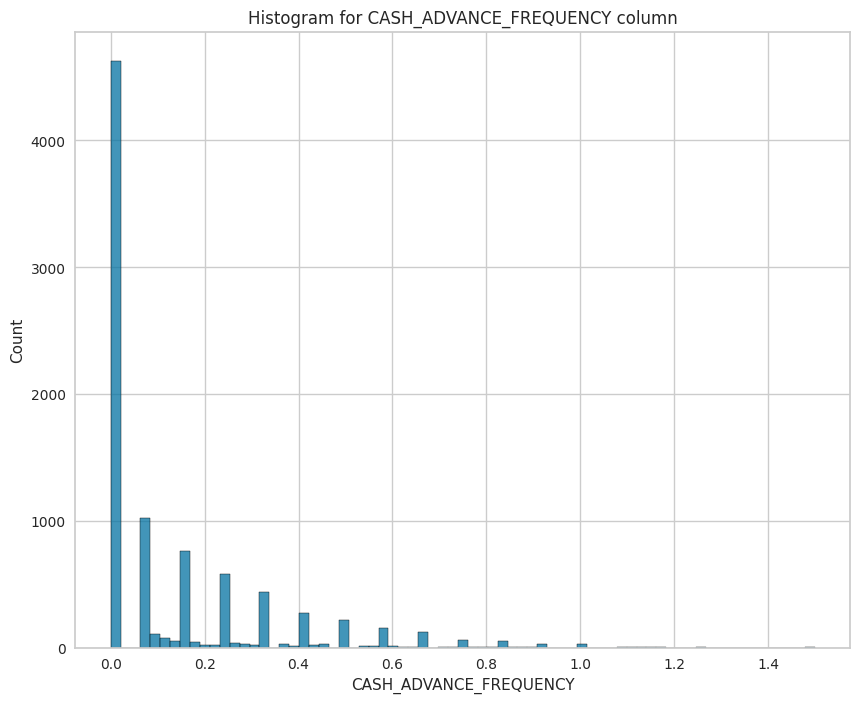

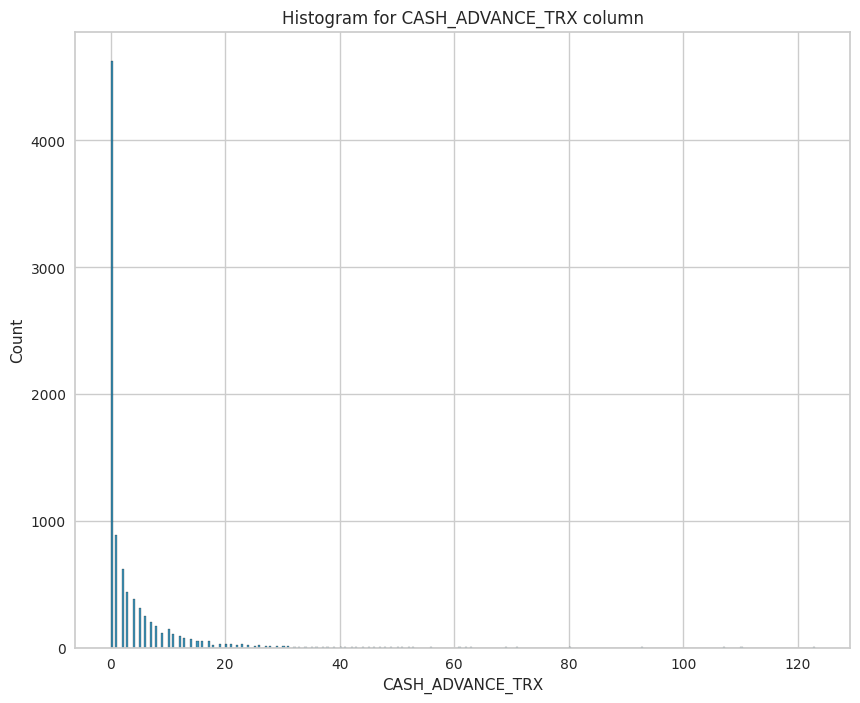

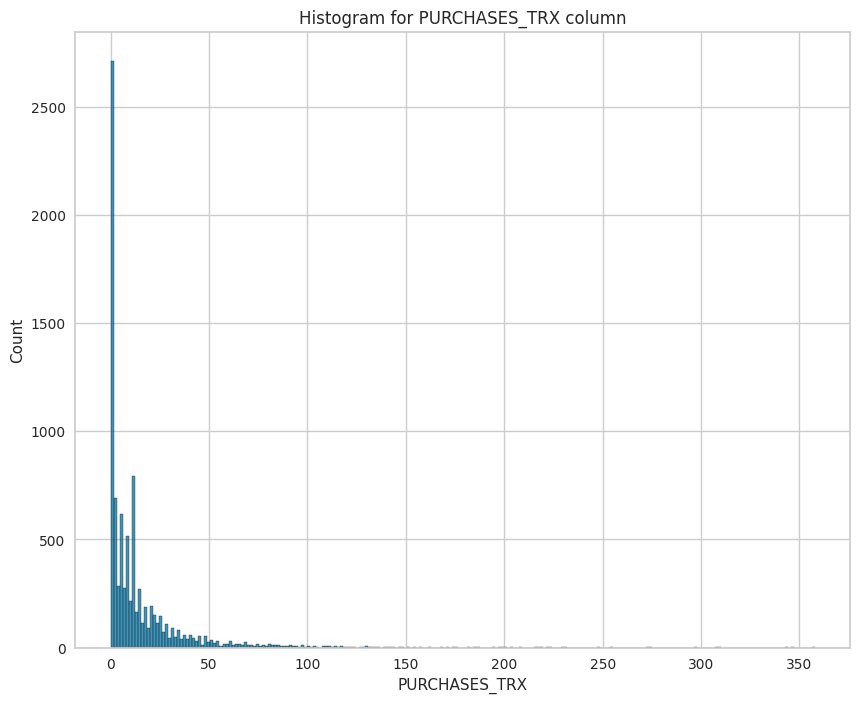

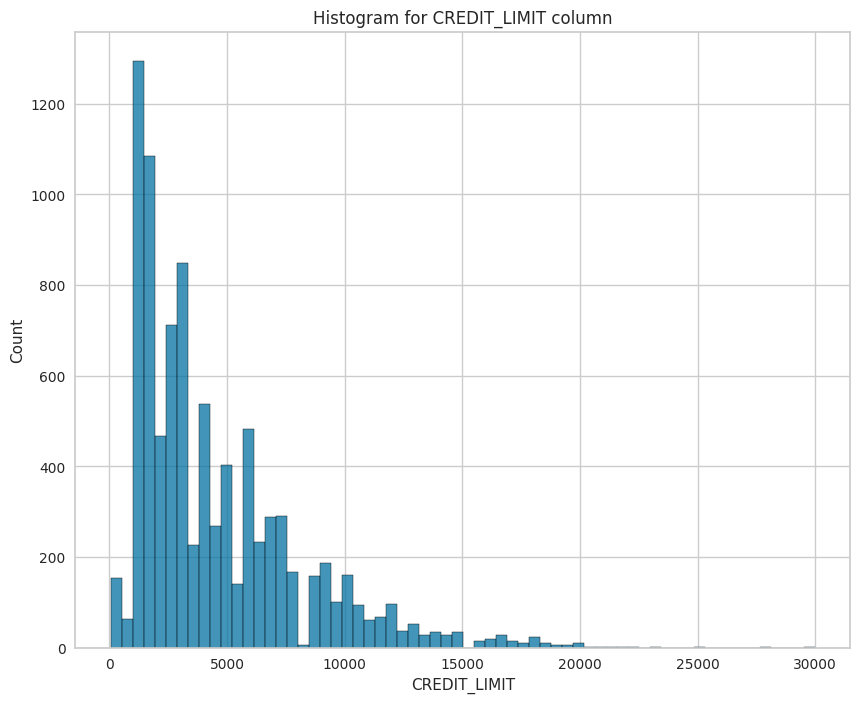

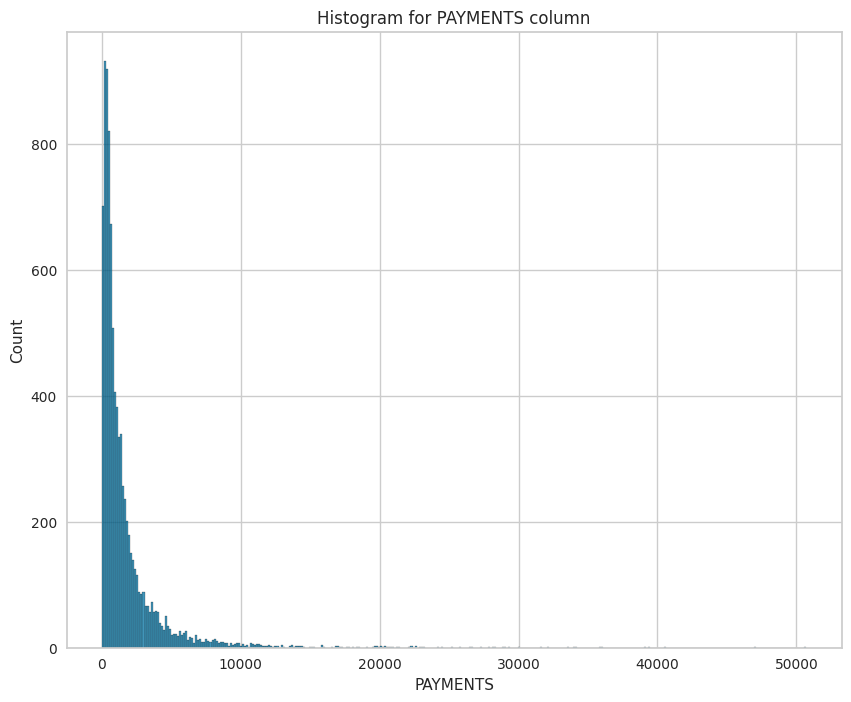

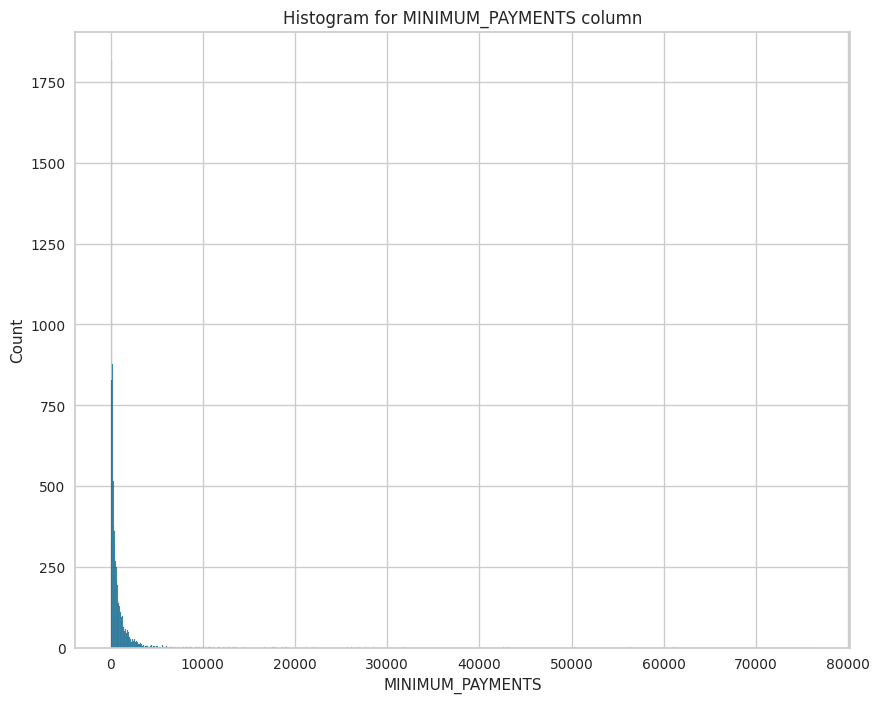

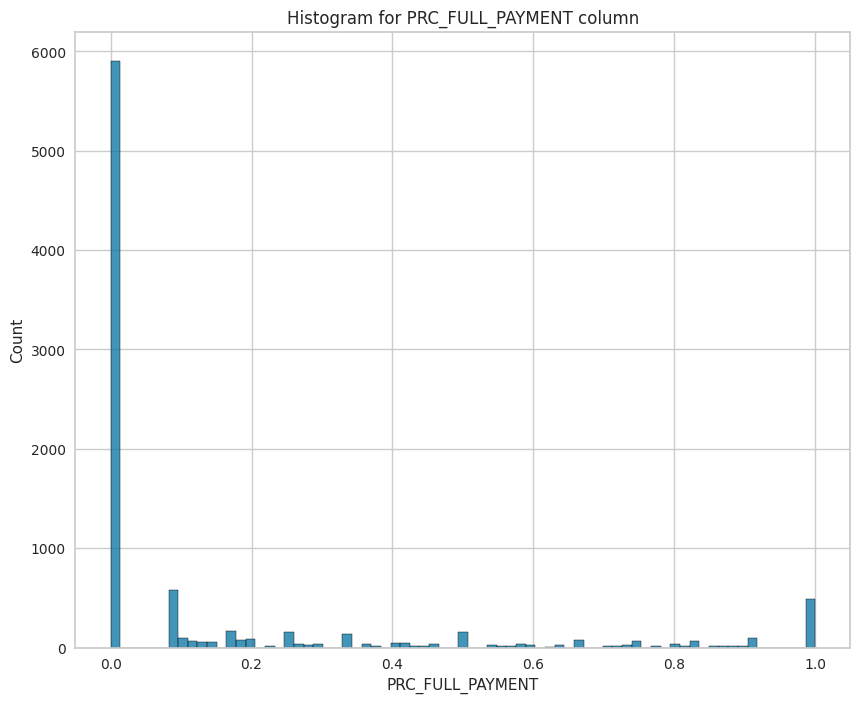

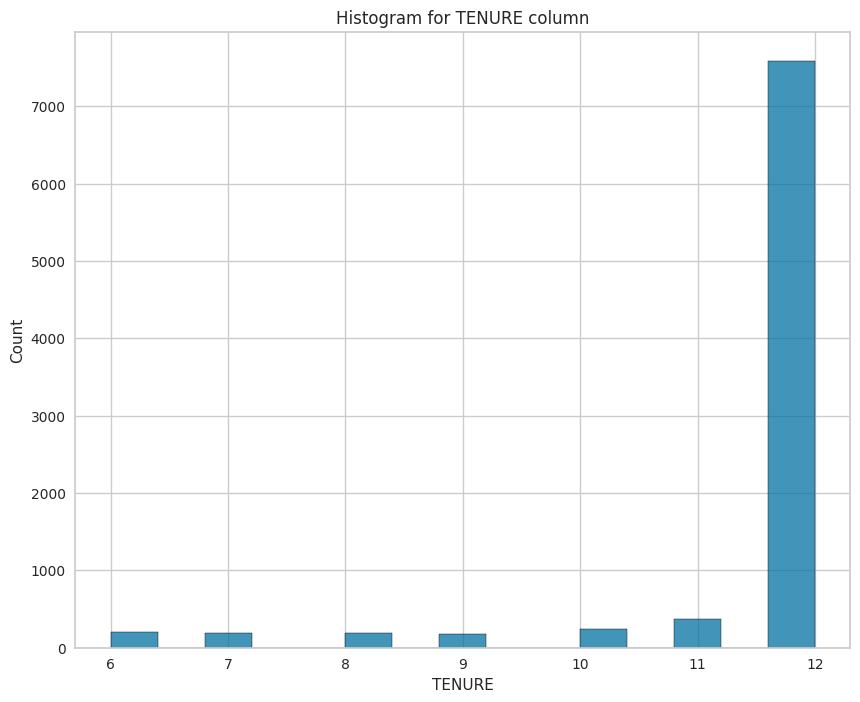

In [9]:
for i in numeric_cols:
    plt.figure(figsize = (10,8))
    sns.histplot(x=df[i])
    plt.title(f"Histogram for {i} column")
    plt.show()

## Observations:
    As most of the data was skewed towards right side so we want to make it to be normally distributed.

## Bivariate Anlaysis

<Axes: >

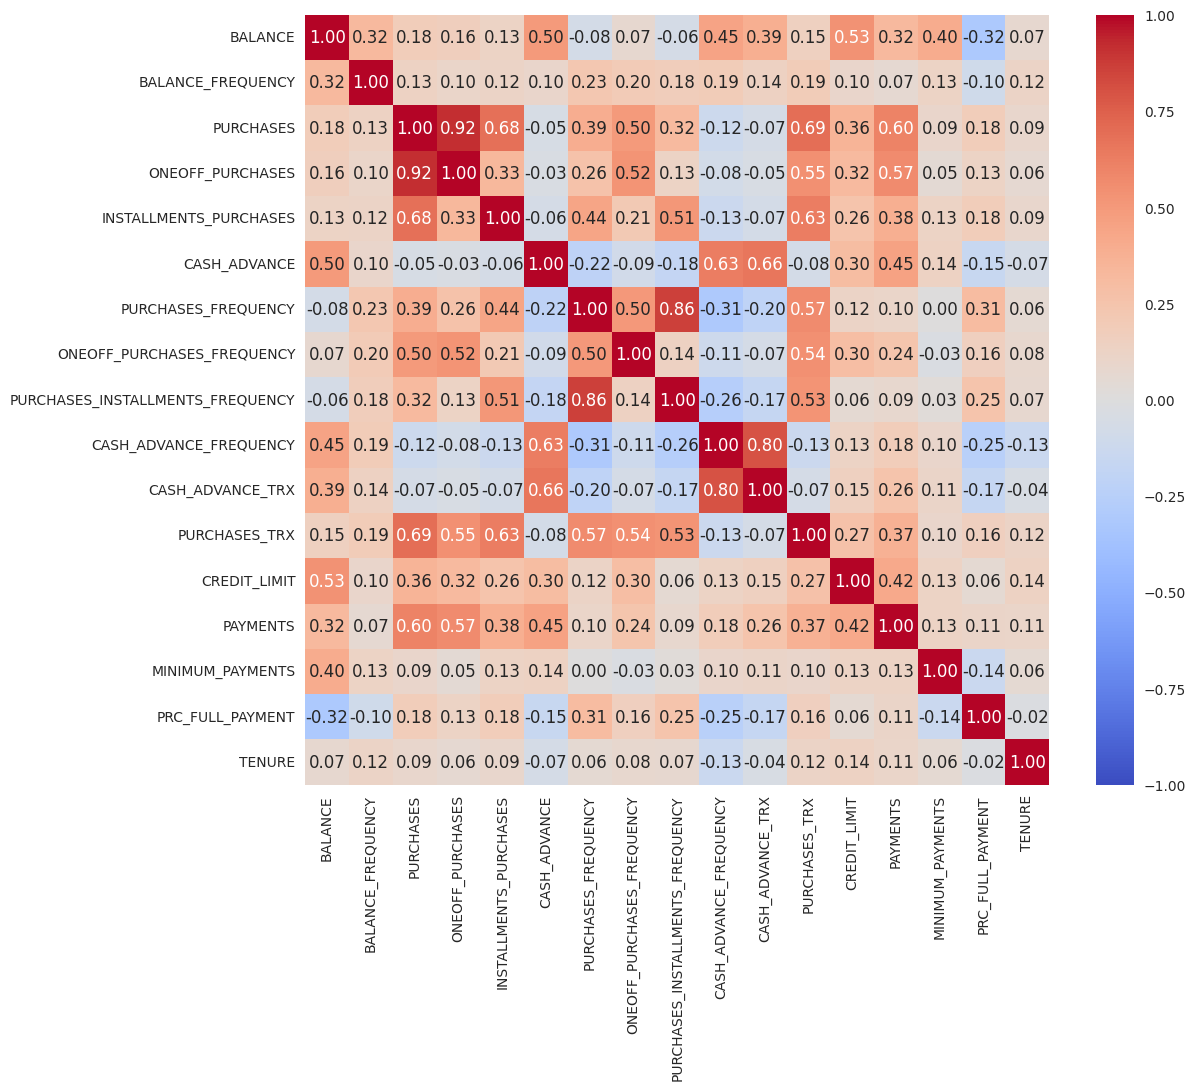

In [10]:
# heat to see the corelation of variables
correlation = df.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="coolwarm",fmt=".2f")

## Observations:
   we can observe "purchases" and "oneoff_purchases" are highly correlated with value 0.92 ."cash_advance_frequency" and "cash_advance_trx" are highly correlated with value 0.80. "purchases_frequency' and 'purchases_installments_frequency' are highly correlated with value 0.86. we can remove one of the variable out of two highly correlated variables

## Data preprocessing

**All the issues that I had found in the previous part**

1-no need to cutomer ID so i will drop it and chek if there any duplicated data and drop  
2- big correlation between som columns        
3-  null values >> needed to fill     
4- different scales and outlaiers  
5- skwewness in our data (right) 
6- CASH_ADVANCE_FREQUENCY column has values more than 1 which needed to remove 


## 1st Issue

In [11]:
#droping ID column
df.drop("CUST_ID",axis=1,inplace=True)

## 2nd Issue(correlation)

## Variable Selection
**PURCHASES vs. ONEOFF_PURCHASES:**

**PURCHASES:** Represents the total amount spent using the credit card for all types of purchases.   
**ONEOFF_PURCHASES:** Represents the total amount spent on single, large purchases.   
**Recommendation:** Keep PURCHASES because it provides a broader overview of the total spending behavior.

**PURCHASES_FREQUENCY vs. PURCHASES_INSTALLMENTS_FREQUENCY:**

**PURCHASES_FREQUENCY:** Indicates how frequently purchases are made.  
**PURCHASES_INSTALLMENTS_FREQUENCY:** Indicates how often installment purchases are made.  
**Recommendation:** Keep PURCHASES_FREQUENCY because it gives a general idea of the overall purchase activity, whereas installment frequency is a more specific behavior.  

**CASH_ADVANCE_FREQUENCY vs. CASH_ADVANCE_TRX:**

**CASH_ADVANCE_FREQUENCY:** Indicates how often cash advances are taken.  
**CASH_ADVANCE_TRX:** The total number of cash advance transactions made.   
**Recommendation:** Keep CASH_ADVANCE_TRX because it provides a direct count of the transactions, which can be more interpretable than a frequency score.

In [12]:
#droping oneoff_purchases,purchases_installements_frequency and cash_advance-frequency
df.drop("ONEOFF_PURCHASES",axis=1,inplace=True)

In [13]:
df.drop("PURCHASES_INSTALLMENTS_FREQUENCY",axis=1,inplace=True)

In [14]:
df.drop("CASH_ADVANCE_FREQUENCY",axis=1,inplace=True)

<Axes: >

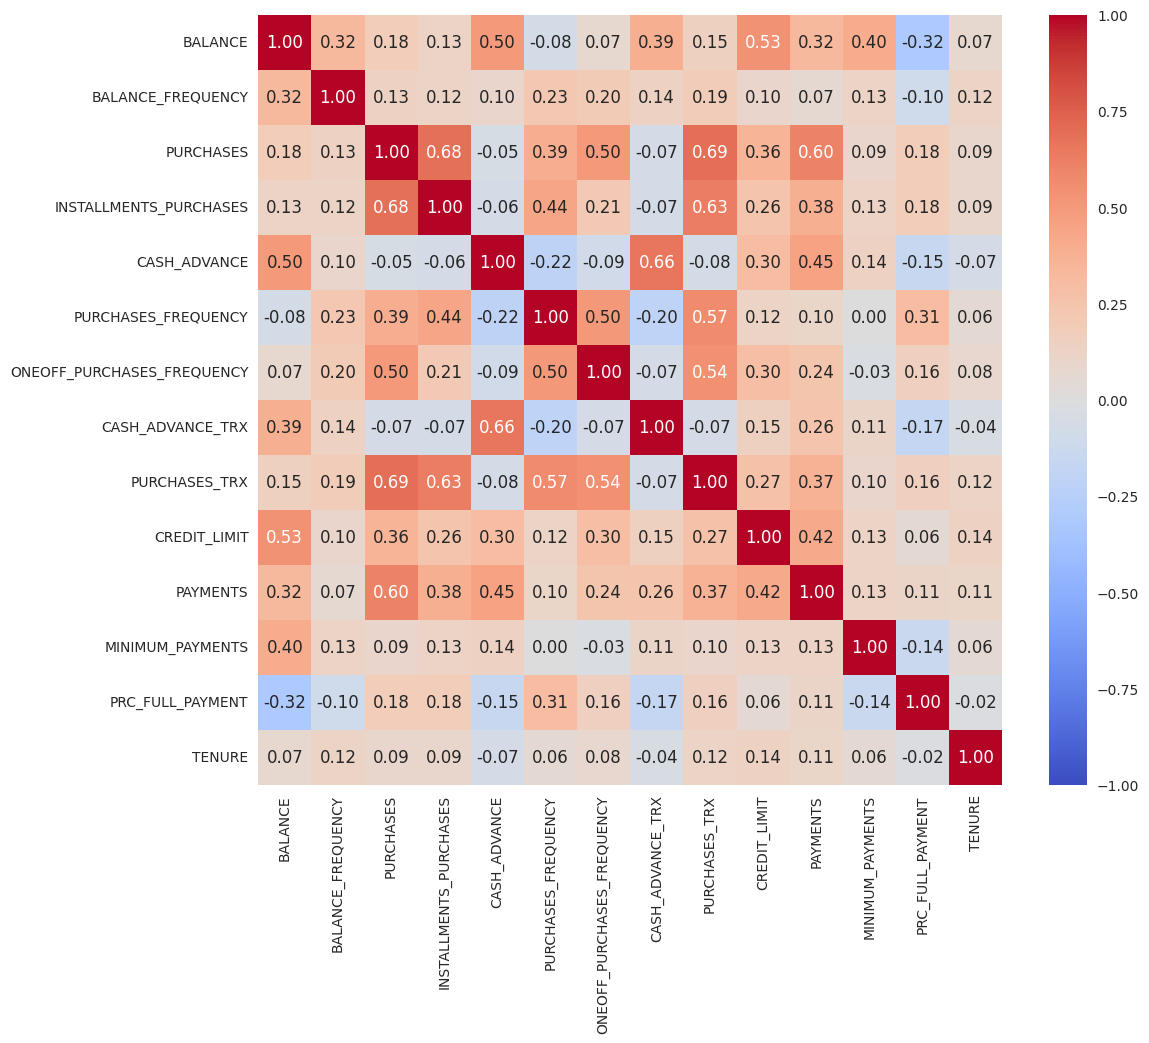

In [15]:
correlation = df.select_dtypes(include=["float64","int64"]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="coolwarm",fmt=".2f")

## 3rd Issue(Null Values)

**CREDIT_LIMIT:** since it has only one null value we can drop it.  
**MINIMUM_PAYMENTS:** since it has 313 null values we can impute those with their median values

In [16]:
df.dropna(subset=["CREDIT_LIMIT"],inplace=True)

In [17]:
#impute mean value in place of null values
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [18]:
df.isnull().sum()

BALANCE                       0
BALANCE_FREQUENCY             0
PURCHASES                     0
INSTALLMENTS_PURCHASES        0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
CASH_ADVANCE_TRX              0
PURCHASES_TRX                 0
CREDIT_LIMIT                  0
PAYMENTS                      0
MINIMUM_PAYMENTS              0
PRC_FULL_PAYMENT              0
TENURE                        0
dtype: int64

## 4th Issue(scaling and outliers)

**StandardScaler**  
**Description:** Standardizes features by removing the mean and scaling to unit variance. It transforms the data to have a mean of 0 and a standard deviation of 1.  
**Effect of Outliers:** Sensitive to outliers because outliers influence the mean and standard deviation, which are used for scaling. If outliers are present, StandardScaler may not perform well as the scaled values may be skewed by the extreme values. 

**RobustScaler**  
**Description:** Scales features using statistics that are robust to outliers. It removes the median and scales the data according to the interquartile range (IQR).  
**Effect of Outliers:** Less sensitive to outliers since it uses the median and IQR, which are not affected by extreme values. This makes RobustScaler more suitable for data with outliers.  

Since outliers are present in the data set we can use RobustScaler for standardizing the data

## Applying Robust Scaling

In [19]:
#Applying Robust Scaler
scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(df)
robust_scaled_df= pd.DataFrame(robust_scaled_data,columns=df.columns)

In [20]:
robust_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432387,-1.636364,-0.248596,0.013656,0.000000,-0.399999,-0.277777,0.00,-0.3125,-0.408163,-0.431661,-0.282866,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.189907,5.784296,-0.600000,-0.277777,1.00,-0.4375,0.816327,2.138325,1.062376,1.555556,0.0
2,0.841881,0.000000,0.384615,-0.189907,0.000000,0.600000,3.055557,0.00,0.3125,0.918367,-0.154807,0.420558,0.000000,0.0
3,0.411728,-3.272727,1.062726,-0.189907,0.184751,-0.500000,0.000000,0.25,-0.3750,0.918367,-0.564601,0.762367,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.189907,0.000000,-0.500000,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.131039,0.000000,0.0


## Feature Transformation

## 1)Applying Quantile Transformation

**Definition:** Quantile transformation maps the data to follow a uniform or normal distribution based on the quantiles of the data.

**Purpose:**

To normalize the distribution of the data, making it closer to a uniform or normal distribution.  
To reduce the impact of outliers by using the data’s quantiles.   
To handle skewed data more effectively than log transformation. 

In [21]:
#Quantile transformation
scaler1 = QuantileTransformer()
quantile_data = scaler1.fit_transform(df)
quantile_transform_df = pd.DataFrame(quantile_data,columns=df.columns)
quantile_transform_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.141593,0.213714,0.306357,0.506448,0.000000,0.341842,0.000000,0.000000,0.323824,0.058559,0.117332,0.155864,0.000000,1.0
1,0.850755,0.282783,0.000000,0.000000,0.973715,0.000000,0.000000,0.755756,0.000000,0.789289,0.907342,0.815178,0.790791,1.0
2,0.792956,1.000000,0.668288,0.000000,0.000000,1.000000,1.000000,0.000000,0.650150,0.821822,0.398543,0.658642,0.000000,1.0
3,0.694262,0.147648,0.811490,0.000000,0.592325,0.265766,0.542543,0.566567,0.265766,0.821822,0.000000,0.750751,0.000000,1.0
4,0.484648,1.000000,0.233496,0.000000,0.000000,0.265766,0.542543,0.000000,0.265766,0.128629,0.425604,0.419606,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.113700,1.000000,0.455788,0.655347,0.000000,1.000000,0.000000,0.000000,0.461461,0.058559,0.208798,0.026116,0.865866,0.0
8945,0.085715,1.000000,0.461962,0.661161,0.000000,1.000000,0.000000,0.000000,0.461461,0.058559,0.167432,0.750751,0.000000,0.0
8946,0.099349,0.232733,0.346339,0.549055,0.000000,0.678178,0.000000,0.000000,0.426927,0.058559,0.046449,0.059630,0.800801,0.0
8947,0.065990,0.232733,0.000000,0.000000,0.523864,0.000000,0.000000,0.650651,0.000000,0.010010,0.034916,0.030983,0.800801,0.0


## Applying Log Transformation

In [22]:
log_transformed_df = (np.log(df+0.1))
log_transformed_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.713590,-0.085360,4.559126,4.559126,-2.302585,-1.321755,-2.302585,-2.302585,0.741937,6.907855,5.307783,4.938851,-2.302585,2.493205
1,8.071708,0.009050,-2.302585,-2.302585,8.770757,-2.302585,-2.302585,1.410987,-2.302585,8.853680,8.319506,6.977692,-1.132515,2.493205
2,7.822144,0.095310,6.650628,-2.302585,-2.302585,0.095310,0.095310,-2.302585,2.493205,8.922672,6.433208,6.441560,-2.302585,2.493205
3,7.418643,-0.306031,7.312620,-2.302585,5.327332,-1.696451,-1.696451,0.095310,0.095310,8.922672,-2.302585,6.762041,-2.302585,2.493205
4,6.706635,0.095310,2.778819,-2.302585,-2.302585,-1.696451,-1.696451,-2.302585,0.095310,7.090160,6.519788,5.500814,-2.302585,2.493205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.353180,0.095310,5.674079,5.674079,-2.302585,0.095310,-2.302585,-2.302585,1.808289,6.907855,5.785960,3.891542,-0.510826,1.808289
8946,2.959235,0.095310,5.704116,5.704116,-2.302585,0.095310,-2.302585,-2.302585,1.808289,6.907855,5.620261,6.762041,-2.302585,1.808289
8947,3.156944,-0.068993,4.973280,4.973280,-2.302585,-0.068993,-2.302585,-2.302585,1.629241,6.907855,4.399016,4.413021,-1.049822,1.808289
8948,2.606945,-0.068993,-2.302585,-2.302585,3.601653,-2.302585,-2.302585,0.741937,-2.302585,6.214808,3.963665,4.022770,-1.049822,1.808289


## Model Fitting

## Applying K-MEANS Clustering

In [23]:
#fit the K Means model
clust_mod = KMeans(n_clusters=2,max_iter=1000,random_state=42,n_init='auto')
clust_mod.fit(df)

KMeans(max_iter=1000, n_clusters=2, n_init='auto', random_state=42)

In [24]:
label = pd.Series(clust_mod.labels_)

In [25]:
#cluster size
label.value_counts()

0    6994
1    1955
Name: count, dtype: int64

In [26]:
#cluster centroids
cluster_centroids = clust_mod.cluster_centers_
cluster_centroids

array([[9.22400383e+02, 8.59810070e-01, 6.44826737e+02, 3.02219305e+02,
        5.29186577e+02, 4.74514179e-01, 1.66033073e-01, 2.32055500e+00,
        1.11976827e+01, 3.01495116e+03, 1.03857418e+03, 6.06121168e+02,
        1.56531181e-01, 1.14560149e+01],
       [3.85777846e+03, 9.39976572e-01, 2.28329905e+03, 7.99918417e+02,
        2.58486529e+03, 5.47144426e-01, 3.32614431e-01, 6.56435138e+00,
        2.72574055e+01, 9.77696861e+03, 4.21397156e+03, 1.78614497e+03,
        1.43736783e-01, 1.17390194e+01]])

## Mertrics to find optimal k

 **Some Evaluation Method** 

* **Inertia (Within-Cluster Sum of Squares):**
        Inertia measures the sum of squared distances of samples to their closest cluster center. Lower inertia indicates tighter clusters.
        Evaluate the inertia for different values of K (number of clusters) and plot it. The "elbow point" in the plot can suggest the optimal number of clusters. However, be cautious as the elbow method is not always definitive.

* **Silhouette Score:**
        Silhouette score measures how similar an object is to its own cluster compared to other clusters.
        Compute the silhouette score for different values of K and choose the K with the highest silhouette score. Higher scores indicate better-defined clusters.
​
* **Calinski-Harabasz Index:**
        Calinski-Harabasz index measures the ratio of between-cluster dispersion to within-cluster dispersion.
        Compute the index for different values of K and choose the K with the highest index. Higher values indicate better clustering.
​
* **Davies-Bouldin Index:**
        Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.
        Compute the index for different values of K and choose the K with the lowest index. Lower values indicate better clustering.


## 1)Silhouette Score

In [27]:
#Silhouette Score
score = silhouette_score(df,clust_mod.labels_)
print("silhoutte score:", score)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(df, clust_mod.labels_)
print("Calinski-Harabasz Index:", ch_index)

# Davies-Bouldin Index
db_index = davies_bouldin_score(df, clust_mod.labels_)
print("Davies-Bouldin Index:", db_index)

silhoutte score: 0.5120956667240968
Calinski-Harabasz Index: 3889.395226057403
Davies-Bouldin Index: 1.2102184045343225


## 2)WCC(within clusters sum of square errors)

In [28]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod1 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod1.fit(df)
    print(k,clust_mod1.inertia_)
    wcss.append(clust_mod1.inertia_)

2 256773463680.29022
3 214665711122.38953
4 189567914465.1639
5 174368663933.86197
6 150184232298.53305
7 140352573913.81738


## 3)Elbow Method

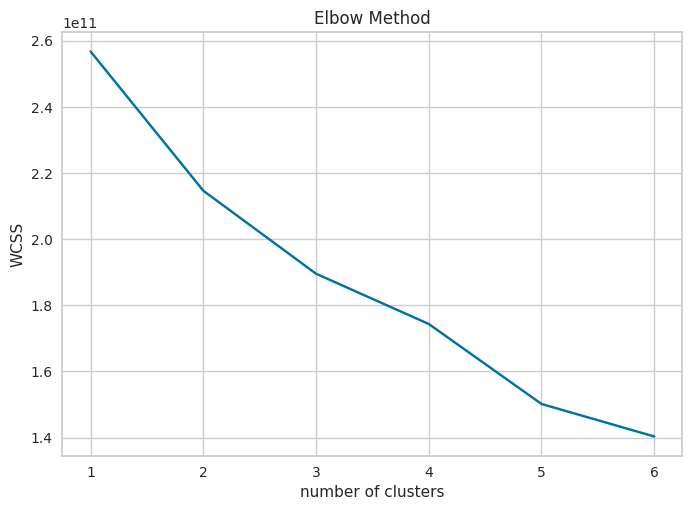

In [29]:
num_clusters = range(1,7)
plt.plot(num_clusters,wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

## Grid Search for achieving best k value

In [30]:
params = {'n_clusters':[2,3,4,5,6,7]}

In [31]:
kmeans_model = KMeans(random_state = 42)

In [32]:
grid_search = GridSearchCV(kmeans_model,params,cv=5,scoring=make_scorer(silhouette_score))
grid_search.fit(df)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7]},
             scoring=make_scorer(silhouette_score))

In [33]:
#best parameters
best_params = grid_search.best_params_
best_params

{'n_clusters': 2}

In [34]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod1 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod1.fit(df)
    print(k,clust_mod1.inertia_)
    print("Silhouette score:", silhouette_score(df,clust_mod1.labels_))
    wcss.append(clust_mod1.inertia_)

2 256773463680.29022
Silhouette score: 0.5120956667240968
3 214665711122.38953
Silhouette score: 0.4571959352613138
4 189567914465.16388
Silhouette score: 0.3929381522215672
5 174368663933.86197
Silhouette score: 0.3521591982243302
6 150184232298.53302
Silhouette score: 0.3585180750426168
7 140352573913.81738
Silhouette score: 0.3735494503409541


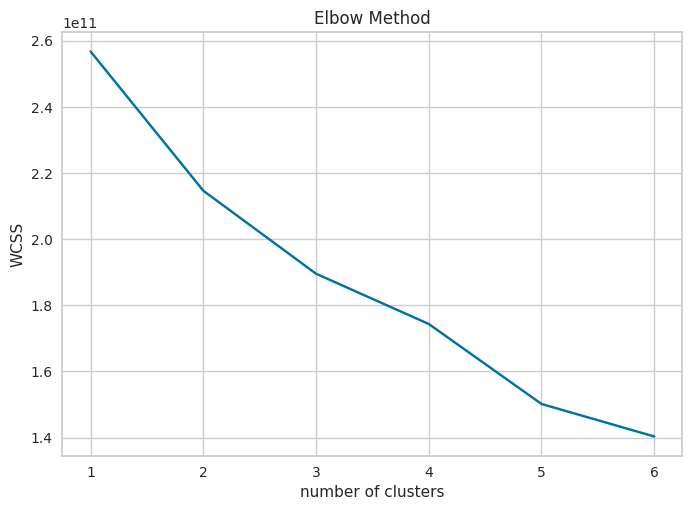

In [35]:
num_clusters = range(1,7)
plt.plot(num_clusters,wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

## Train model with best parameters

In [36]:
#fitting model with best parameters 
best_kmeans_model = KMeans(n_clusters = 2,random_state=42)
best_kmeans_model.fit(df)

KMeans(n_clusters=2, random_state=42)

## Evaluating clustering performance

In [37]:
#Silhouette Score
score1 = round(silhouette_score(df,best_kmeans_model.labels_)*100,2)
print("best K value:",best_params["n_clusters"])
print("silhoutte score:", score1)

best K value: 2
silhoutte score: 51.23


## Silhouette Visualizer graph for normal data

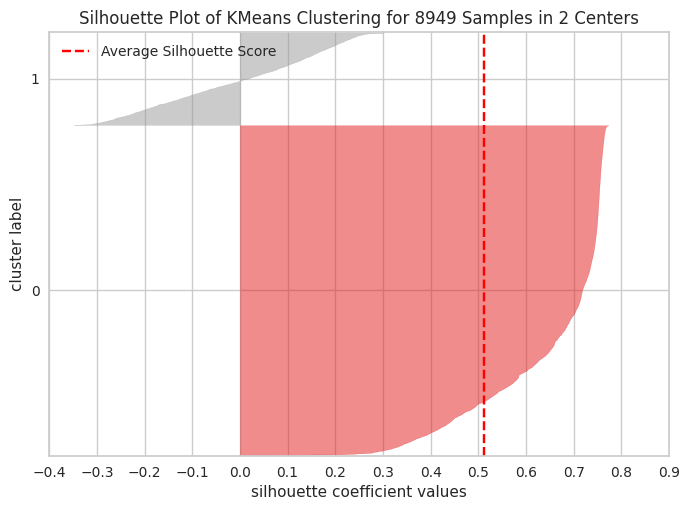

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8949 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
viz = SilhouetteVisualizer(best_kmeans_model,colours='yellowbrick')
viz.fit(df)
viz.show()

## Applying K-MEANS on Robust Scaling data

In [39]:
params = {"n_clusters":[2,3,4,5,6,7]}

In [40]:
kmeans_model2 = KMeans(random_state=42)

## Apply Random Search CV to fint best parameters

In [41]:
grid_search1 = GridSearchCV(kmeans_model2,params,cv=5,scoring = make_scorer(silhouette_score))
grid_search1.fit(robust_scaled_df)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7]},
             scoring=make_scorer(silhouette_score))

In [42]:
#best parameters
best_param = grid_search1.best_params_['n_clusters']
best_param

2

In [43]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod1 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod1.fit(robust_scaled_df)
    print(k,clust_mod1.inertia_)
    print("Silhouette score:", silhouette_score(robust_scaled_df,clust_mod1.labels_))
    wcss.append(clust_mod1.inertia_)

2 344177.0833152296
Silhouette score: 0.6694343376728346
3 306824.9839564854
Silhouette score: 0.25706945623111005
4 260330.32057568562
Silhouette score: 0.26605405926365683
5 227519.63973006455
Silhouette score: 0.28867738651668784
6 214585.21477844624
Silhouette score: 0.2647226163347217
7 189135.95952196448
Silhouette score: 0.3028550655854543


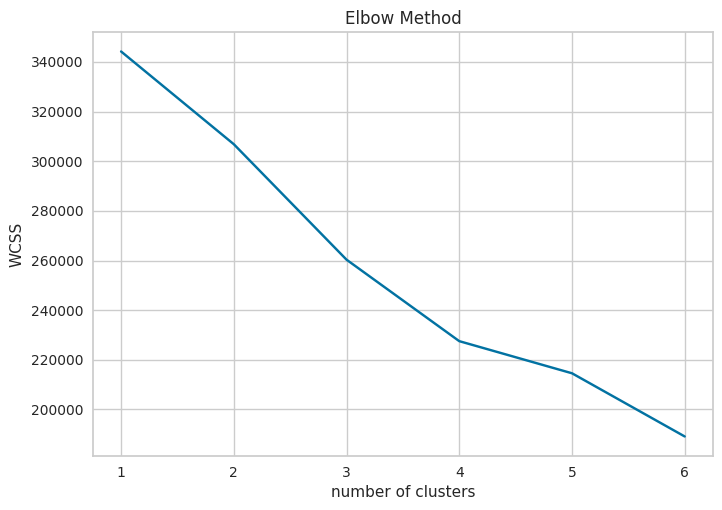

In [44]:
num_clusters = range(1,7)
plt.plot(num_clusters,wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [45]:
#Training the k means model with best k value
best_kmeans_model1 = KMeans(n_clusters=best_param,random_state = 42)
best_kmeans_model1.fit(robust_scaled_df)

KMeans(n_clusters=2, random_state=42)

## Evaluating clustering performance

In [46]:
score2 = round(silhouette_score(robust_scaled_df,best_kmeans_model1.labels_)*100,2)
print("best k value:", best_param)
print("silhouette_score:", score2)

best k value: 2
silhouette_score: 78.26


## Silhouette Visualizer for Robust Scaled Data

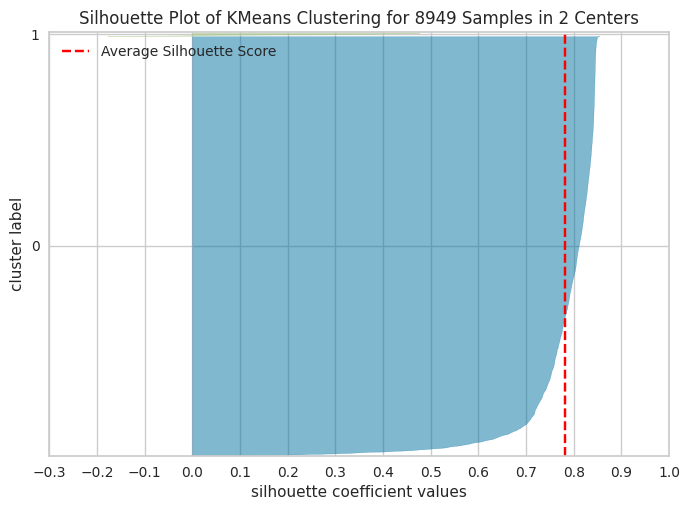

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8949 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
viz = SilhouetteVisualizer(best_kmeans_model1,colors='yellowbrick')
viz.fit(robust_scaled_df)
viz.show()

## Applying K-MEANS on Quantile Transformed Data

In [48]:
kmeans_model3 = KMeans(random_state=42)

In [49]:
params = {"n_clusters":[2,3,4,5,6,7]}

## Apply grid search for best parameters

In [50]:
grid_search2 = GridSearchCV(kmeans_model3,params,cv=5,scoring=make_scorer(silhouette_score))
grid_search2.fit(log_transformed_df)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7]},
             scoring=make_scorer(silhouette_score))

In [51]:
best=grid_search2.best_params_['n_clusters']

In [52]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod1 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod1.fit(log_transformed_df)
    print(k,clust_mod1.inertia_)
    print("Silhouette score:", silhouette_score(log_transformed_df,clust_mod1.labels_))
    wcss.append(clust_mod1.inertia_)

2 359596.7648034645
Silhouette score: 0.4361110807701624
3 225611.2048997869
Silhouette score: 0.47987898881711255
4 188663.08043671865
Silhouette score: 0.4669038691202407
5 129699.41068726032
Silhouette score: 0.5085906824630263
6 110233.57883892617
Silhouette score: 0.433058709860743
7 101954.58691388954
Silhouette score: 0.4363670557537434


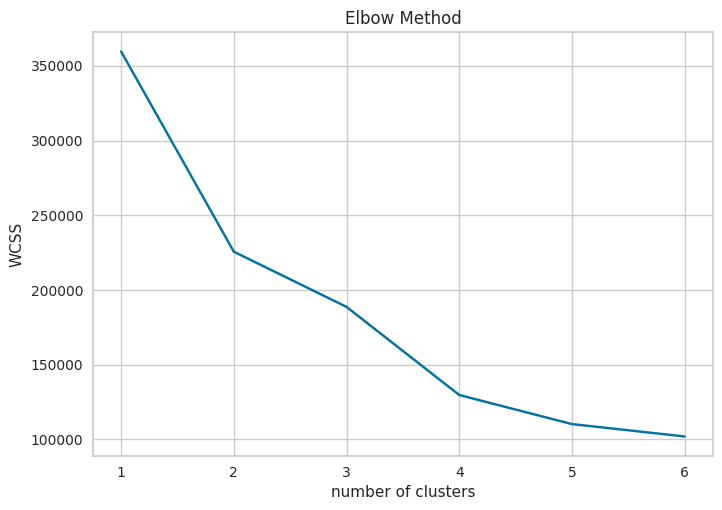

In [53]:
num_clusters = range(1,7)
plt.plot(num_clusters,wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

## apply k-means with best parameters

In [54]:
best_kmeans_model2 = KMeans(5,random_state=42)
best_kmeans_model2.fit(log_transformed_df)

KMeans(n_clusters=5, random_state=42)

## Evaluating clustering performance

In [55]:
score3 = round(silhouette_score(log_transformed_df,best_kmeans_model2.labels_)*100,2)
print("best k value:", best)
print("silhouette_score:", score3)

best k value: 2
silhouette_score: 50.86


## Silhouette Visualizer for Log Transformed Data

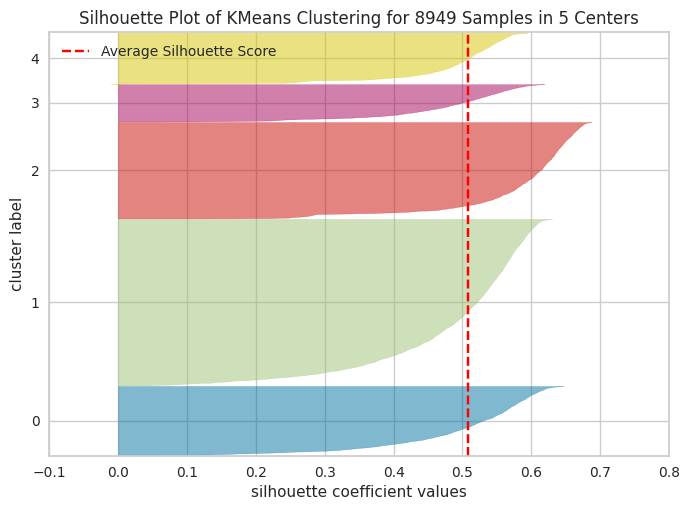

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8949 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
viz = SilhouetteVisualizer(best_kmeans_model2,colors='yellowbrick')
viz.fit(log_transformed_df)
viz.show()

## Applying Hierarchical Clustering

Before we start the training process we need to specify 3 paramters: 
* 1- Linkage criteria : The linkage criterion determines the distance between two clusters  

     - Complete-Linkage Clustering 
     - Single-Linkage Clustering 
     - Average-Linkage Clustering 
     - Centroid Linkage Clustering 
* 2- Distance function: 
     - Euclidean Distance   
     - Manhattan Distance  
     - Mahalanobis distance   
* 3- Number of clusters :
      using dendogram we can get the optimal number of clusters
 

In [57]:
#create a dendogram
linked = linkage(df,method='complete')

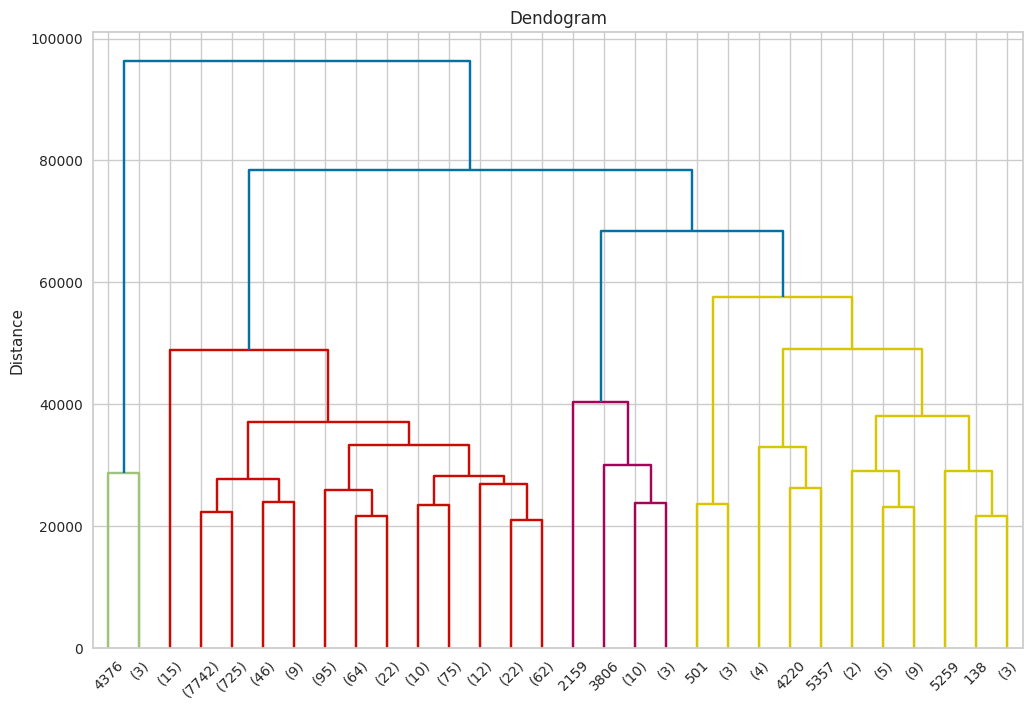

In [58]:
plt.figure(figsize=(12,8))
dendrogram(linked,orientation='top',truncate_mode='lastp',p=30)
plt.title("Dendogram")
plt.ylabel("Distance")
plt.show()

Number of clusters: 2, Silhouette Score: 0.8888023496945788
Number of clusters: 3, Silhouette Score: 0.825129280078878
Number of clusters: 4, Silhouette Score: 0.8139818171470687
Number of clusters: 5, Silhouette Score: 0.8109066466871637
Number of clusters: 6, Silhouette Score: 0.8075807417144265
Number of clusters: 7, Silhouette Score: 0.781607604457975


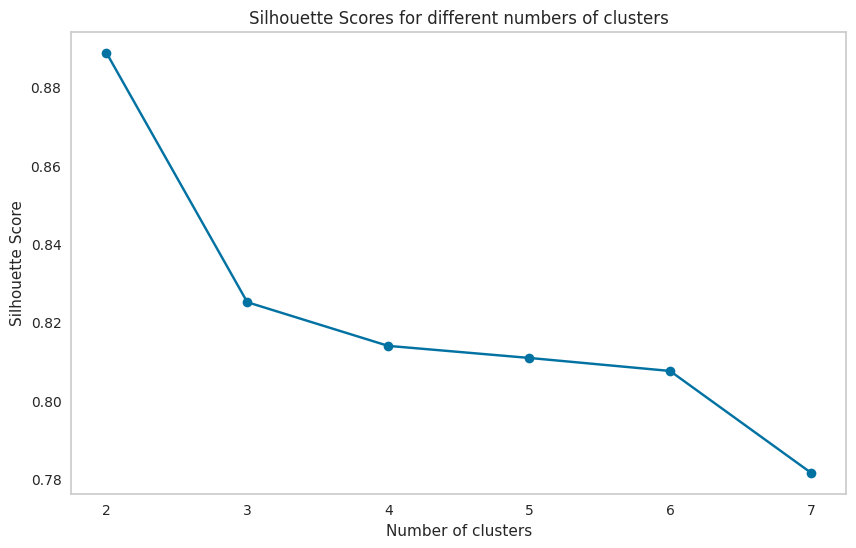

In [59]:
wcss = []
silhouette_scores = []
clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    clust1 = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    clust1.fit(df)
    silhouette_avg = silhouette_score(df, clust1.labels_)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid()
plt.show()

In [60]:
hc = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='complete')

In [61]:
hc.fit(df)

AgglomerativeClustering(linkage='complete', metric='euclidean')

## Evaluating Clustering performance

In [62]:
score4 = round(silhouette_score(df, hc.labels_)*100,2)
print("Silhouette score:", score4)

Silhouette score: 88.88


## Hirarical Clustring on robust scaled data

In [63]:
#create a dendogram
linked1 = linkage(robust_scaled_df,method='complete')

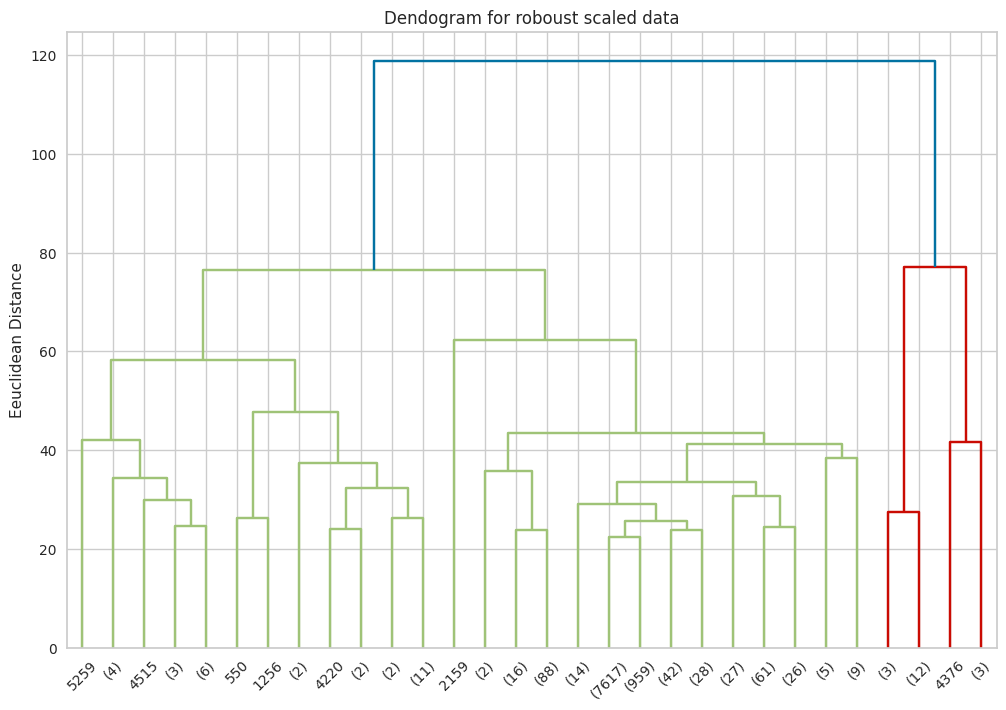

In [64]:
plt.figure(figsize=(12,8))
dendrogram(linked1,orientation='top',truncate_mode='lastp',p=30)
plt.title("Dendogram for roboust scaled data")
plt.ylabel("Eeuclidean Distance")
plt.show()

Number of clusters: 2, Silhouette Score: 0.8595199374497967
Number of clusters: 3, Silhouette Score: 0.8290018596204541
Number of clusters: 4, Silhouette Score: 0.796269167482449
Number of clusters: 5, Silhouette Score: 0.7962728545144804
Number of clusters: 6, Silhouette Score: 0.794398001466789
Number of clusters: 7, Silhouette Score: 0.7809389882510028


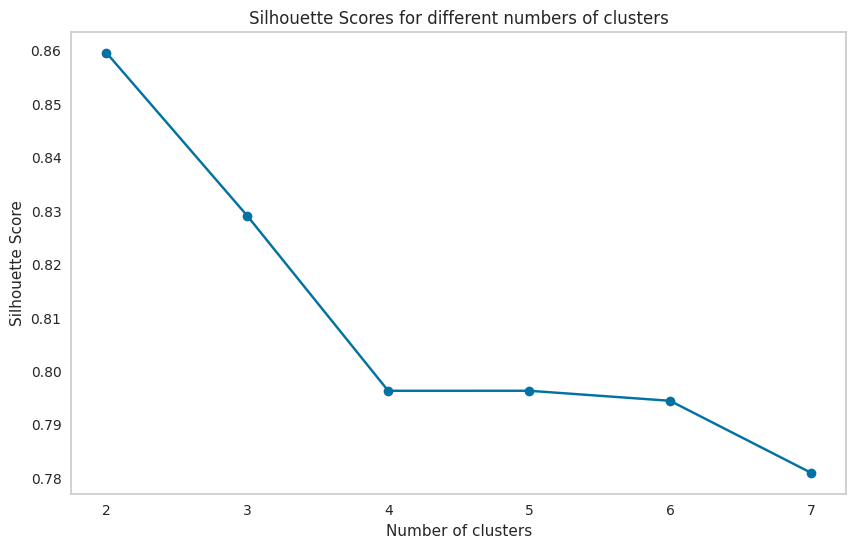

In [65]:
wcss = []
silhouette_scores = []
clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    clust1 = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    clust1.fit(robust_scaled_df)
    silhouette_avg = silhouette_score(robust_scaled_df, clust1.labels_)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid()
plt.show()

In [66]:
hc1 = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='complete')

In [67]:
 hc1.fit(robust_scaled_df)

AgglomerativeClustering(linkage='complete', metric='euclidean')

## Evaluating clustering performance

In [68]:
score5 = round(silhouette_score(robust_scaled_df, hc1.labels_)*100,2)
print("Silhouette Score:", score5)

Silhouette Score: 85.95


## hierarical clustering on quantile transformed data

In [69]:
link = linkage(log_transformed_df,method='complete',metric='euclidean')

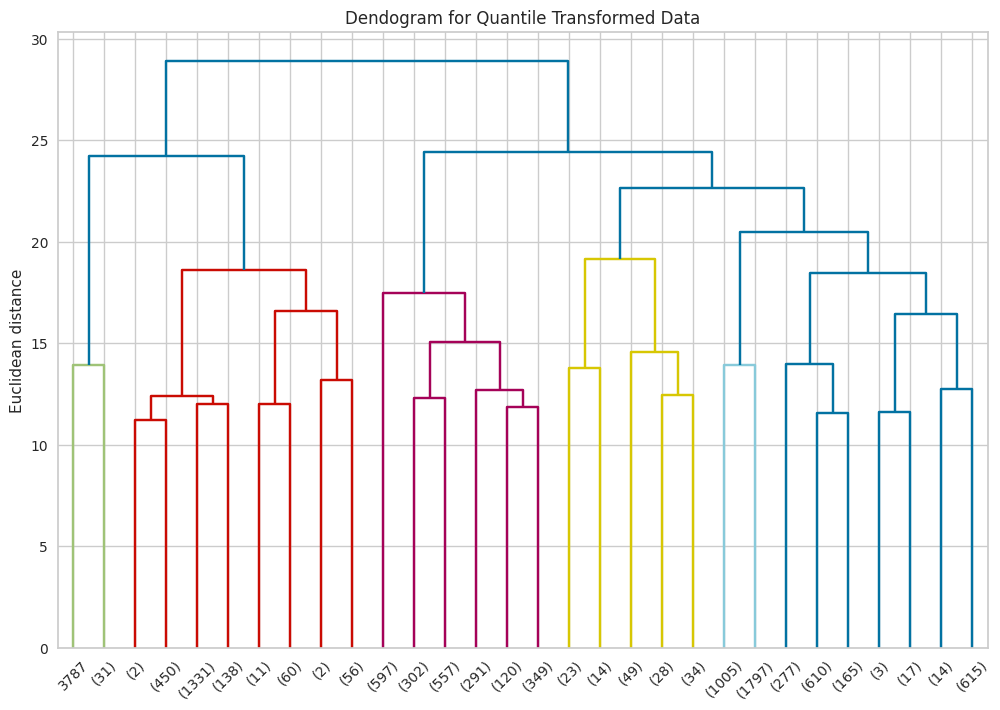

In [70]:
plt.figure(figsize=(12,8))
dendrogram(link,p=30,orientation='top',truncate_mode='lastp')
plt.title("Dendogram for Quantile Transformed Data")
plt.ylabel('Euclidean distance')
plt.show()

Number of clusters: 2, Silhouette Score: 0.4358131135914782
Number of clusters: 3, Silhouette Score: 0.472764534448787
Number of clusters: 4, Silhouette Score: 0.43996661757348127
Number of clusters: 5, Silhouette Score: 0.4504747620816797
Number of clusters: 6, Silhouette Score: 0.40924475733902416
Number of clusters: 7, Silhouette Score: 0.4102448574169209


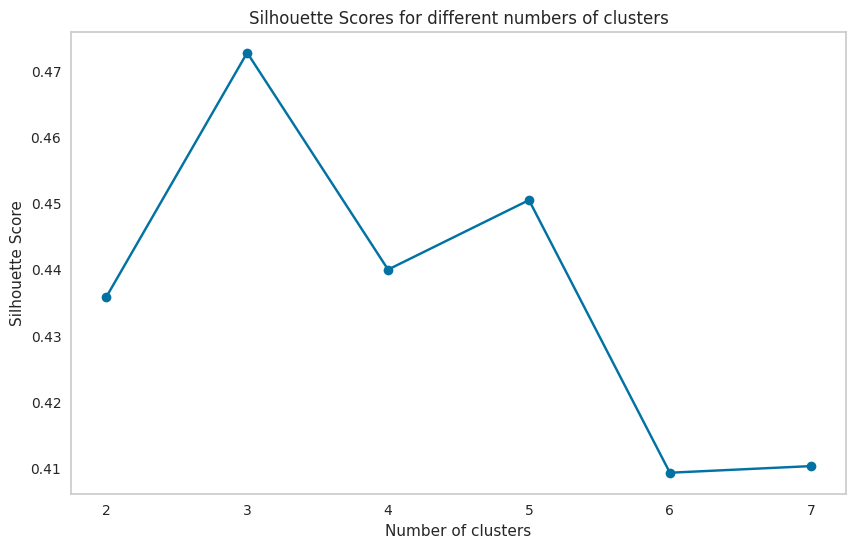

In [71]:
wcss = []
silhouette_scores = []
clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    clust1 = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    clust1.fit(log_transformed_df)
    silhouette_avg = silhouette_score(log_transformed_df, clust1.labels_)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid()
plt.show()

In [72]:
hc2 = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')

In [73]:
hc2.fit(log_transformed_df)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

## Evaluating Clustering performance

In [74]:
score6 = round(silhouette_score(log_transformed_df, hc2.labels_)*100,2)
print("Silhouette Score:", score6)

Silhouette Score: 47.28


## Applying PCA on data

In [75]:
testpca = PCA()
y=testpca.fit(df)

In [76]:
var_cum = np.cumsum(y.explained_variance_ratio_)*100
var_cum

array([ 48.71946631,  65.34195222,  80.09232332,  91.60409686,
        96.35798174,  99.04851066,  99.999224  ,  99.99993257,
        99.99999527,  99.99999936,  99.99999965,  99.9999998 ,
        99.9999999 , 100.        ])

In [77]:
k=np.argmax(var_cum>95)
print("Number of components explaining 95% variance:", k)

Number of components explaining 95% variance: 4


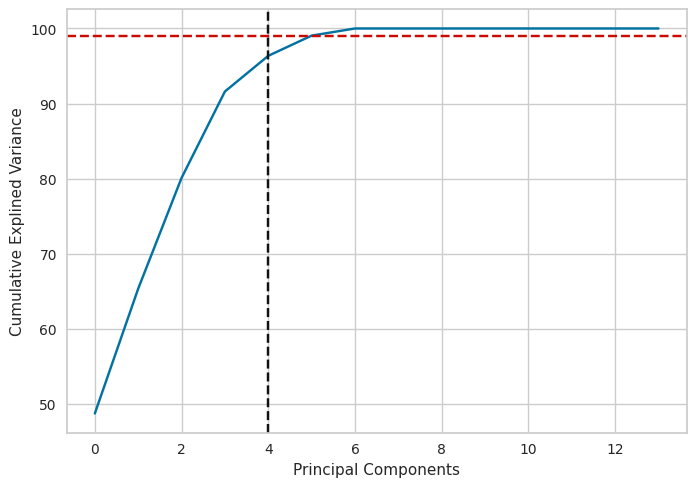

In [78]:
plt.plot(var_cum)
plt.ylabel("Cumulative Explined Variance")
plt.xlabel("Principal Components")
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')
plt.show()

## Observations:
      as it indicates taking number of components as 4 that can retrieve 95% variance

In [79]:
final_pca = PCA(n_components=4)
final_data = final_pca.fit_transform(df)
final_pca_df = pd.DataFrame(final_data,columns=["component 1","component 2","component 3","component 4"])
final_pca_df

,component 1,component 2,component 3,component 4
0,-4325.325890,748.243306,37.741306,-101.713745
1,4467.595870,-688.763419,2177.609599,-4314.350203
2,1551.442839,-2579.481041,-1509.223320,735.069278
3,1272.177878,-2504.220437,-1742.579876,1217.964356
4,-3725.512431,718.977475,367.785367,-215.833596
...,...,...,...,...
8944,-4213.920925,960.131295,-64.003601,-56.858233
8945,-4122.419948,823.869738,518.045744,411.475687
8946,-4380.010974,707.571841,-33.739610,-79.243960
8947,-4801.877213,859.741204,192.310151,-238.373413


## Applying KMEANS on PCA data

In [80]:
param = {'n_clusters':[2,4,5]}

In [81]:
k_means = KMeans(random_state=42)

In [82]:
grid = GridSearchCV(k_means,param,cv=5,scoring=make_scorer(silhouette_score))
grid.fit(final_pca_df)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [2, 4, 5]},
             scoring=make_scorer(silhouette_score))

In [83]:
best_k = grid.best_params_['n_clusters']
print("best k value:", best_k)

best k value: 2


In [84]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod1 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod1.fit(final_pca_df)
    print(k,clust_mod1.inertia_)
    wcss.append(clust_mod1.inertia_)

2 225851387124.64886
3 183835844751.24274
4 159359499375.45398
5 136154435122.95122
6 120843432709.90825
7 113231029874.68175


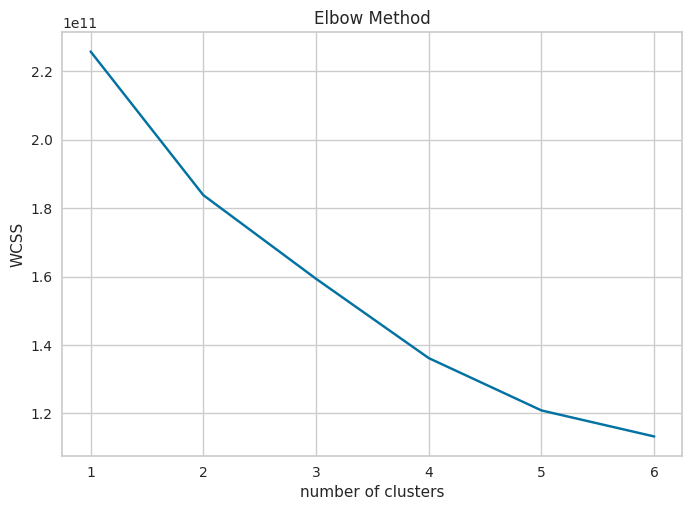

In [85]:
num_clusters = range(1,7)
plt.plot(num_clusters,wcss)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [86]:
k_means_model = KMeans(n_clusters=2,random_state=42)
k_means_model.fit(final_pca_df)

KMeans(n_clusters=2, random_state=42)

##  Evaluating clustering performance

In [87]:
score7= round(silhouette_score(final_pca_df,k_means_model.labels_)*100,2)
print("Silhouette Score:", score7)

Silhouette Score: 52.99


## Applying PCA on Robust Scaled Data

In [88]:
pca1 = PCA()
y1 = pca1.fit(robust_scaled_df)

In [89]:
var_cum1 = np.cumsum(y1.explained_variance_ratio_)*100
var_cum1

array([ 28.71256819,  49.94135918,  64.38078429,  74.55656831,
        82.07143608,  86.31063065,  89.9385791 ,  93.00469502,
        95.32291527,  96.99845494,  98.218208  ,  99.24764149,
        99.75415864, 100.        ])

In [90]:
k1=np.argmax(var_cum>95)
print("Number of components explaining 95% variance:", k1)

Number of components explaining 95% variance: 4


In [91]:
final_pca1 = PCA(n_components = 4)
final_data1 = final_pca1.fit_transform(robust_scaled_df)
final_pca_df1 = pd.DataFrame(final_data1,columns=['component 1','component 2','component 3','component 4'])

## Applying KMeans on Robust Scaled data using PCA

In [92]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod1 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod1.fit(final_pca_df1)
    print(k,clust_mod1.inertia_)
    print("silhouette score: ",silhouette_score(final_pca_df1,clust_mod1.labels_))
    wcss.append(clust_mod1.inertia_)

2 241076.105318957
silhouette score:  0.8232048238853424
3 202561.4729237595
silhouette score:  0.2900707910865411
4 158333.31272619046
silhouette score:  0.3428960256302336
5 128786.53701386339
silhouette score:  0.399079744256058
6 108893.72834662521
silhouette score:  0.4064367230450363
7 99493.26707414517
silhouette score:  0.3658128691607752


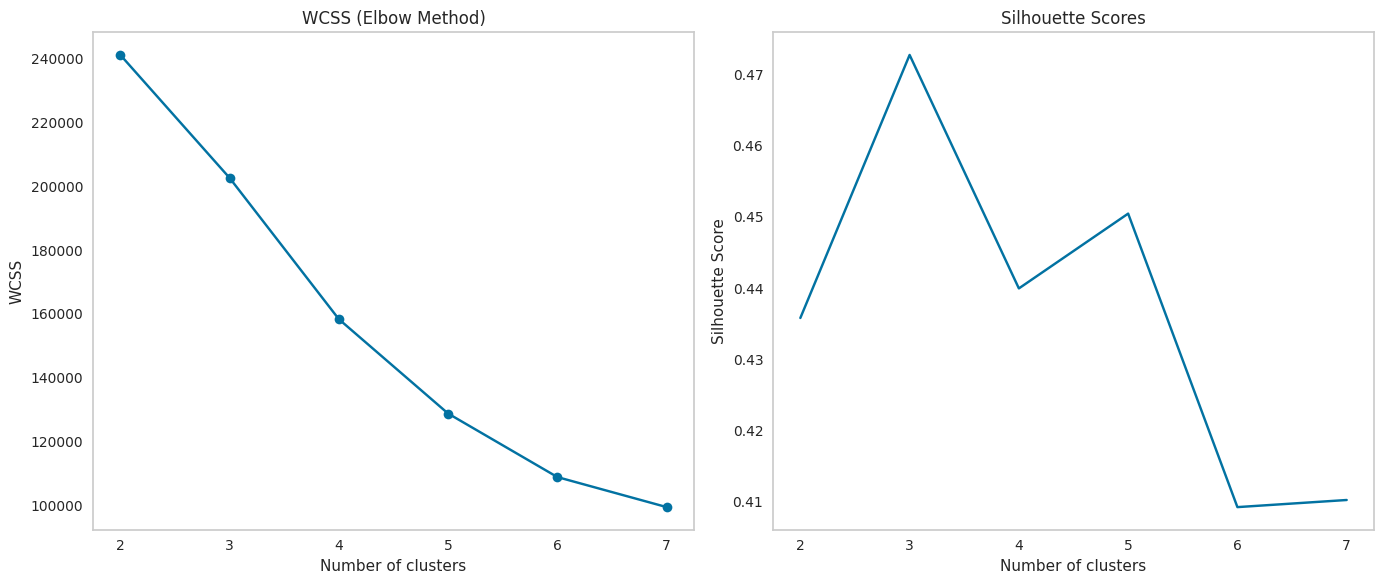

In [93]:
# Plot WCSS (Elbow Method)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS (Elbow Method)')
plt.grid()

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(clusters, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.grid()
plt.tight_layout()
plt.show()

In [94]:
mod = KMeans(random_state=42)

In [95]:
params = {'n_clusters' : [3,4]}

In [96]:
gs = GridSearchCV(mod,params,cv=5,scoring=make_scorer(silhouette_score))
gs.fit(final_pca_df1)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [3, 4]},
             scoring=make_scorer(silhouette_score))

In [97]:
k_means_model1 = KMeans(n_clusters=3,random_state=42)
k_means_model1.fit(final_pca_df1)

KMeans(n_clusters=3, random_state=42)

## Evaluating clustering performance

In [98]:
score8 = round(silhouette_score(final_pca_df1,k_means_model1.labels_)*100,2)
print("Silhouette Score:", score8)

Silhouette Score: 50.1


## Applying PCA on Quantile transformed data

In [99]:
final_pca2 = PCA(n_components=4)
final_data2 = final_pca2.fit_transform(log_transformed_df)
final_pca_df2 = pd.DataFrame(final_data2,columns=['componemt 1','componemt 2','component 3','component 4'])
final_pca_df2

,componemt 1,componemt 2,component 3,component 4
0,-4.278959,-3.451785,-2.485849,0.207913
1,11.362317,0.468206,-0.708091,-2.229265
2,-2.151008,-3.705431,6.004488,-0.888130
3,3.567141,-0.785686,2.901495,6.648416
4,0.555436,-6.242917,2.486216,-1.935750
...,...,...,...,...
8944,-6.022703,-2.380355,-2.587706,0.864597
8945,-5.878516,-2.098254,-2.391842,0.585033
8946,-5.229456,-3.265295,-2.817035,1.444842
8947,7.425108,-6.000598,-3.451501,2.260449


In [100]:
wcss = []
clusters =[2,3,4,5,6,7]
for k in clusters:
    clust_mod2 = KMeans(n_clusters=k,random_state=42,n_init='auto')
    clust_mod2.fit(final_pca_df2)
    print(k,clust_mod1.inertia_)
    print("Silhouette score: ",silhouette_score(final_pca_df2,clust_mod2.labels_))
    wcss.append(clust_mod1.inertia_)

2 99493.26707414517
Silhouette score:  0.4750856774566102
3 99493.26707414517
Silhouette score:  0.537361245157825
4 99493.26707414517
Silhouette score:  0.5390017909488484
5 99493.26707414517
Silhouette score:  0.597274822773375
6 99493.26707414517
Silhouette score:  0.5341847513501312
7 99493.26707414517
Silhouette score:  0.5267005738956553


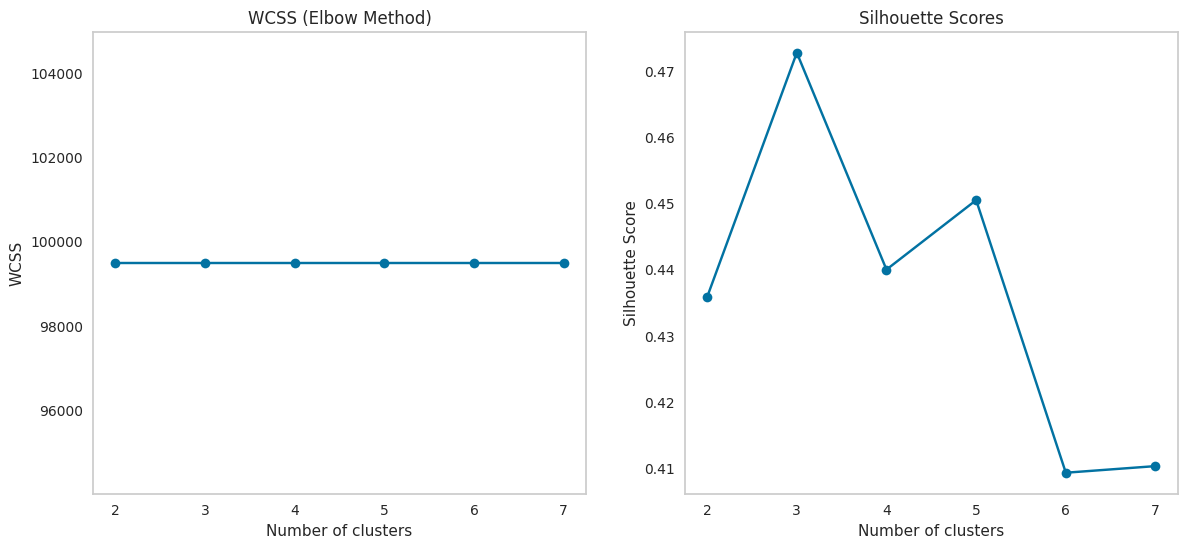

In [101]:
# Plot WCSS (Elbow Method)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS (Elbow Method)')
plt.grid()

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.grid()

In [102]:
k_means_model2 = KMeans(n_clusters=5,random_state=42)
k_means_model2.fit(final_pca_df2)

KMeans(n_clusters=5, random_state=42)

## Evaluating clustering performance

In [103]:
score9 = round(silhouette_score(final_pca_df2,k_means_model2.labels_)*100,2)
print("Silhouette Score:", score9)

Silhouette Score: 59.73


## Applying Hierarical Clustering on data with PCA

## Hierarical clustering on PCA data without transformation

In [104]:
link = linkage(final_pca_df,method='complete',metric ='euclidean' )

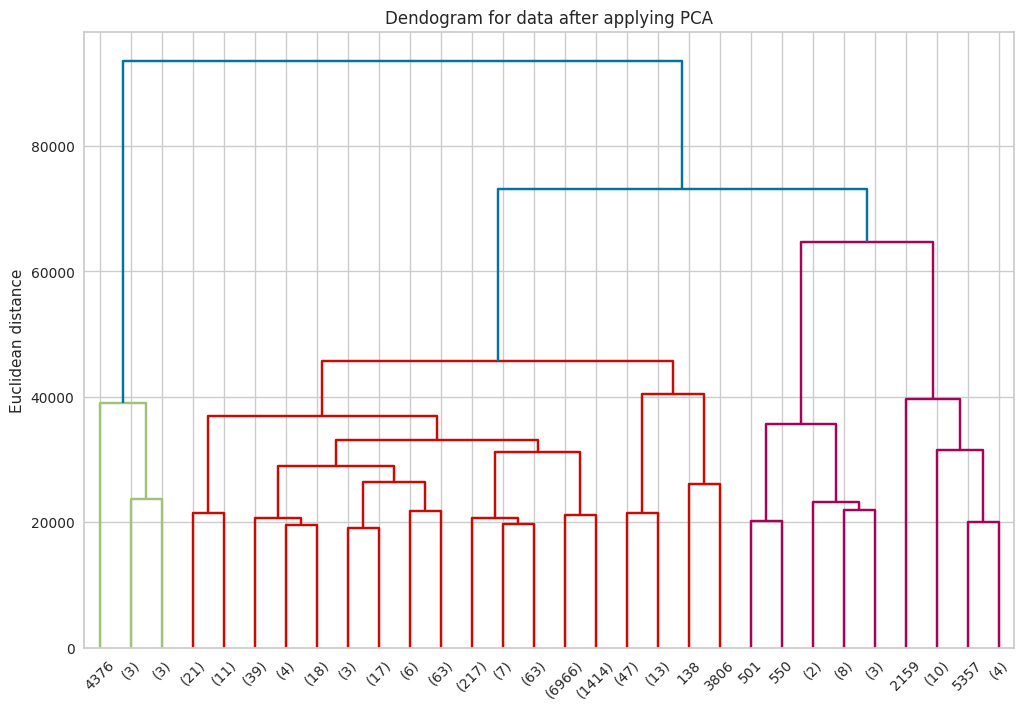

In [105]:
plt.figure(figsize=(12,8))
dendrogram(link,p=30,orientation='top',truncate_mode='lastp')
plt.title("Dendogram for data after applying PCA")
plt.ylabel("Euclidean distance")
plt.show()

Number of clusters: 2, Silhouette Score: 0.8739378713375077
Number of clusters: 3, Silhouette Score: 0.8426166846408469
Number of clusters: 4, Silhouette Score: 0.8236968478354323
Number of clusters: 5, Silhouette Score: 0.6636437335591598
Number of clusters: 6, Silhouette Score: 0.6496044202850633
Number of clusters: 7, Silhouette Score: 0.6491897825698417


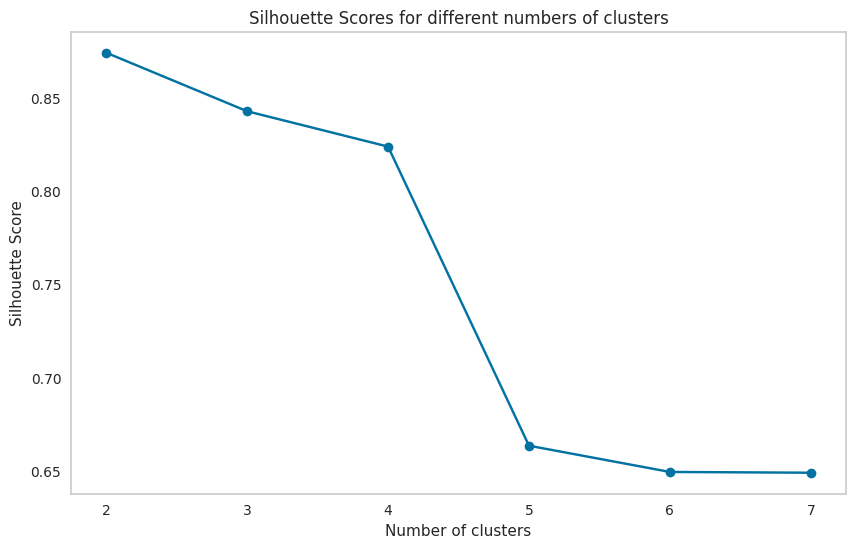

In [106]:
wcss = []
silhouette_scores = []
clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    clust1 = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    clust1.fit(final_pca_df)
    silhouette_avg = silhouette_score(final_pca_df, clust1.labels_)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid()
plt.show()

In [107]:
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='complete')
cluster.fit(final_pca_df)

AgglomerativeClustering(linkage='complete', metric='euclidean')

## Evaluating clustering performance

In [108]:
score10 = round(silhouette_score(final_pca_df,cluster.labels_)*100,2)
print("Silhouette Score:", score10)

Silhouette Score: 87.39


## Hierarical clustering on pca with roboust transformed data

In [109]:
link1 = linkage(final_pca_df1,method='complete',metric ='euclidean')

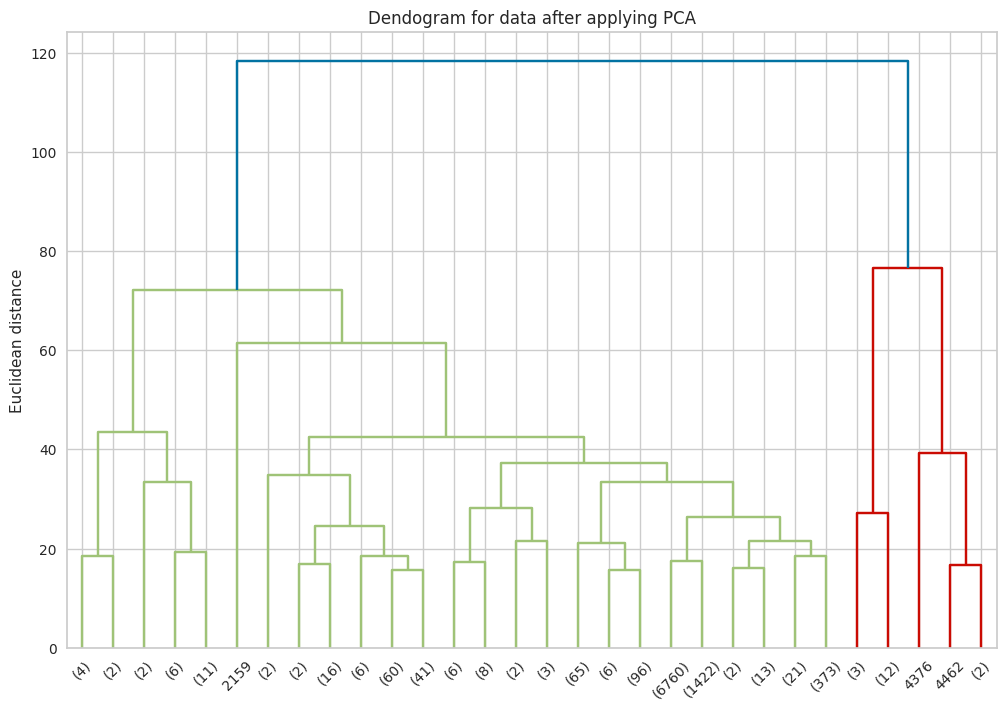

In [110]:
plt.figure(figsize=(12,8))
dendrogram(link1,p=30,orientation='top',truncate_mode='lastp')
plt.title("Dendogram for data after applying PCA")
plt.ylabel("Euclidean distance")
plt.show()

Number of clusters: 2, Silhouette Score: 0.8879981363231505
Number of clusters: 3, Silhouette Score: 0.8635069746287873
Number of clusters: 4, Silhouette Score: 0.8310754200855882
Number of clusters: 5, Silhouette Score: 0.8310919836653159
Number of clusters: 6, Silhouette Score: 0.8261672551898029
Number of clusters: 7, Silhouette Score: 0.6270333257316466


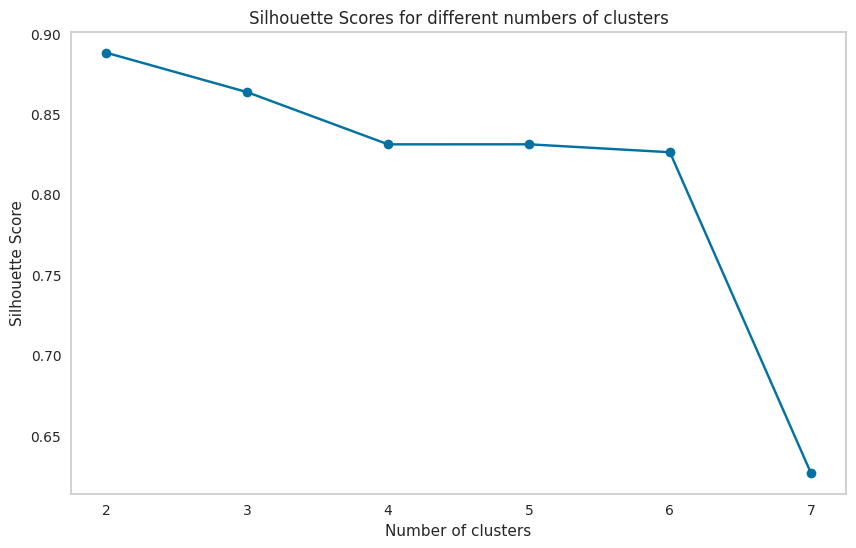

In [111]:
wcss = []
silhouette_scores = []
clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    clust1 = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    clust1.fit(final_pca_df1)
    silhouette_avg = silhouette_score(final_pca_df1, clust1.labels_)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid()
plt.show()

In [112]:
clust1 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
clust1.fit(final_pca_df1)
score11 = round(silhouette_score(final_pca_df1, clust1.labels_)*100,2)
print("silhouette Score:", score11)

silhouette Score: 88.8


## Hierarical clustering on pca with Quantile transformed data

In [113]:
link2 = linkage(final_pca_df2,method='complete',metric ='euclidean')

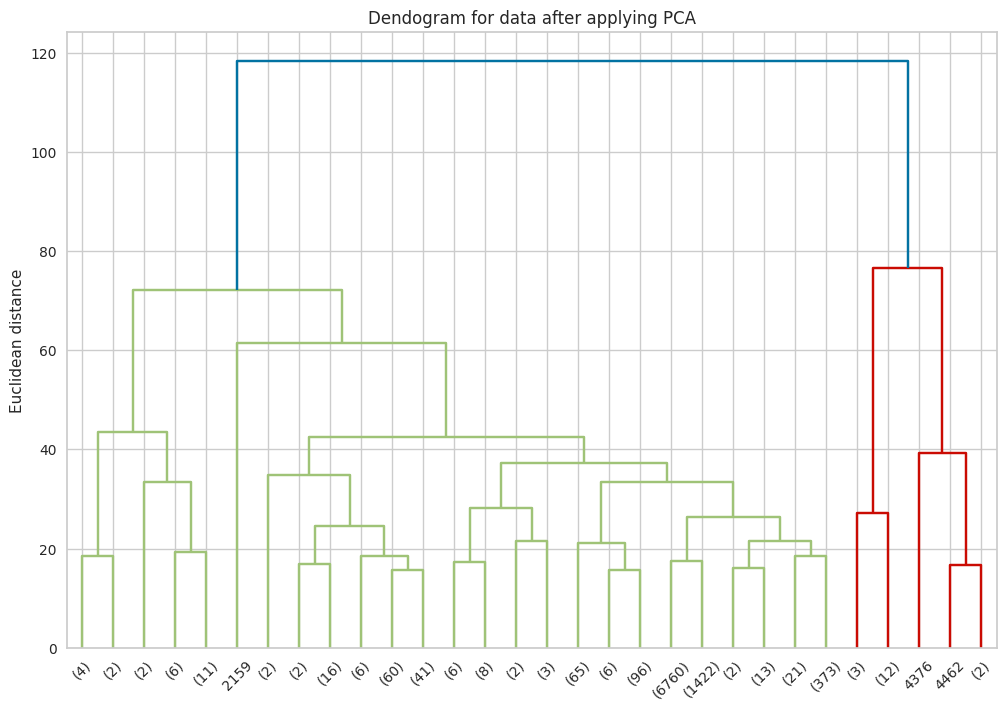

In [114]:
plt.figure(figsize=(12,8))
dendrogram(link1,p=30,orientation='top',truncate_mode='lastp')
plt.title("Dendogram for data after applying PCA")
plt.ylabel("Euclidean distance")
plt.show()

Number of clusters: 2, Silhouette Score: 0.4764654102101801
Number of clusters: 3, Silhouette Score: 0.5376117885829754
Number of clusters: 4, Silhouette Score: 0.5623245379546085
Number of clusters: 5, Silhouette Score: 0.5970324084826946
Number of clusters: 6, Silhouette Score: 0.5245880639580902
Number of clusters: 7, Silhouette Score: 0.5118511891667443


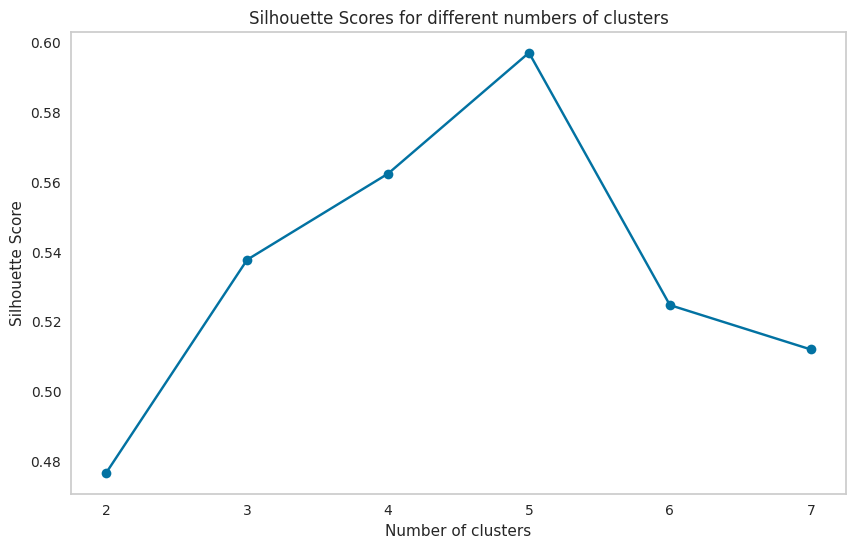

In [115]:
wcss = []
silhouette_scores = []
clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    clust1 = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    clust1.fit(final_pca_df2)
    silhouette_avg = silhouette_score(final_pca_df2, clust1.labels_)
    print(f"Number of clusters: {k}, Silhouette Score: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores

plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different numbers of clusters')
plt.grid()
plt.show()

In [116]:
clust1 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clust1.fit(final_pca_df2)
score12 = round(silhouette_score(final_pca_df2, clust1.labels_)*100,2)
print("Silhouette Score:", score12)

Silhouette Score: 59.7


In [117]:
models = pd.DataFrame({"Model":["KMeans Clustering without any transformation","KMeans Clustering with Robust Scaling transformation",
                               "KMeans Clustering with  Quantile transformation","Hierarichal Clustering without any transformation",
                               "Hierarichal Clustering with Robust Scaling transformation","Hierarical Clustering with  Quantile transformation",
                               "PCA on data without any transformation","PCA and KMeans clustering on data with Robust transformation",
                               "PCA and KMeans clustering on data with Quantile transformation",
                                "PCA and Hierarical clustering on data without any transformation",
                               "PCA and Hierarical clustering on data with Robust transformation",
                               "PCA and Hierarical clustering on data with Quantile transformation"],
                       "Silhouette Score":[score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,score11,score12]})

In [118]:
models

,Model,Silhouette Score
0,KMeans Clustering without any transformation,51.23
1,KMeans Clustering with Robust Scaling transfor...,78.26
2,KMeans Clustering with Quantile transformation,50.86
3,Hierarichal Clustering without any transformation,88.88
4,Hierarichal Clustering with Robust Scaling tra...,85.95
5,Hierarical Clustering with Quantile transform...,47.28
6,PCA on data without any transformation,52.99
7,PCA and KMeans clustering on data with Robust ...,50.10
8,PCA and KMeans clustering on data with Quantil...,59.73
9,PCA and Hierarical clustering on data without ...,87.39
